In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("C:/Users/HP/Downloads/Decision Tree/Decision Tree/heart_disease.xlsx",sheet_name='Heart_disease')
df.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
categorical_features = df.describe(include=["object","bool"]).columns
categorical_features

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [5]:
continous_features = df.describe(include=["int64","float64"]).columns
continous_features

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

In [6]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [7]:
df['num_cat'] = df['num'].replace({0:'No Heart Disease',1:'Stage 1',2:'Stage 2',3:'Stage 3',4:'Stage 4'})
df.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num           num_cat  
0  False      2.3  downsloping  fixed defect    0  No Heart Disease  
1  False      0.0         flat  fixed defect    0  No Heart Disease  
2  False      0.4         flat  fixed defect    0  No Heart Disease  
3  False      0.0         flat  fixed defect    0  No Heart Disease  
4   True      1.5         flat  fixed defect    0  No Heart Disease

#### About data

+ age	Age in years
+ Gender	Gender ; Male - 1, Female -0
+ cp	Chest pain type
+ trestbps	Resting blood pressure
+ chol	cholesterol measure
+ fbs	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
+ restecg	"ecg observation at resting condition,   -- normal:0,st-t abnormality:1,lv hypertrophy:2
+ thalch	maximum heart rate achieved
+ exang	exercise induced angina
+ oldpeak	ST depression induced by exercise relative to rest
+ slope	the slope of the peak exercise ST segment
+ thal	Thal
+ num	target [0=no heart disease; 1,2,3,4 = stages of heart disease ]

In [8]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

The features are not on the same scale. For example thalch has a mean of 135.957048 and age has a mean of 53.791850.

In [9]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
num_cat      0
dtype: int64

In [10]:
df.shape

(908, 14)

In [11]:
missing_percentage = df['oldpeak'].isnull().sum() / len(df) * 100
print(f'The percentage missing value in oldpeak : {missing_percentage:.2f} %')

The percentage missing value in oldpeak : 6.83 %


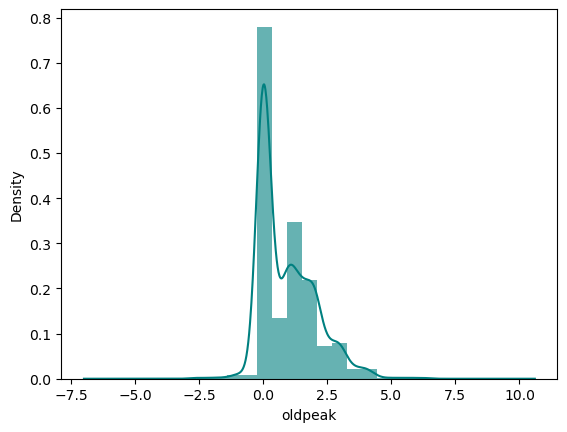

In [12]:
ax = df["oldpeak"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["oldpeak"].plot(kind='density', color='teal')
ax.set(xlabel='oldpeak')
plt.show()

Science 'Oldpeak' is (right) skewed, using mean might give us biased results. To deal with this, we will use the median to impute the missing values.

In [13]:
print('The mean of oldpeak is {:.2f}'.format(df['oldpeak'].mean()))
print('The median of oldpeak is {:.2f}'.format(df['oldpeak'].median()))

The mean of oldpeak is 0.89
The median of oldpeak is 0.50


In [14]:
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)

In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
num_cat     0
dtype: int64

In [16]:
df[df.duplicated()]

age   sex           cp  trestbps  chol    fbs           restecg  thalch  \
765   58  Male  non-anginal       150   219  False  st-t abnormality     118   

    exang  oldpeak        slope    thal  num  num_cat  
765  True      0.0  downsloping  normal    2  Stage 2

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df[df.duplicated()]

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, thal, num, num_cat]
Index: []

The data has one duplicated value. we dropped it.

### Data Visualization
+ #### Univariate plots

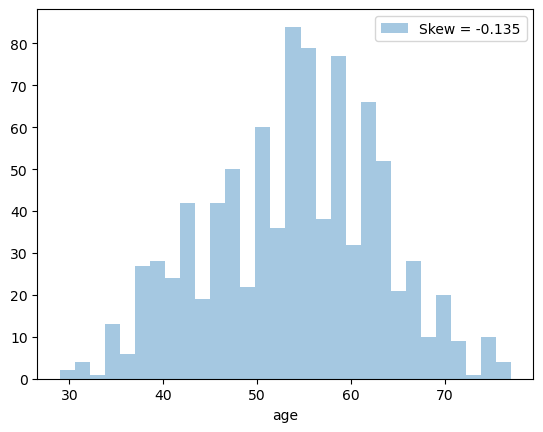

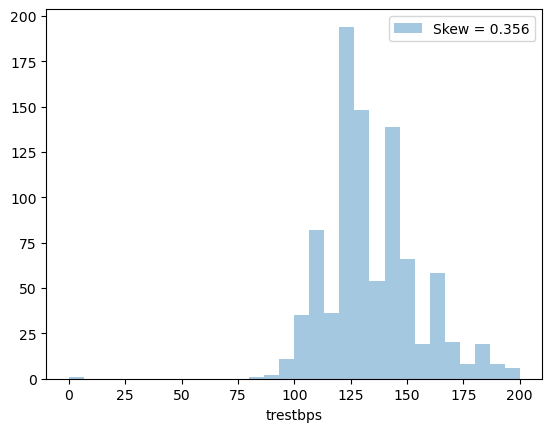

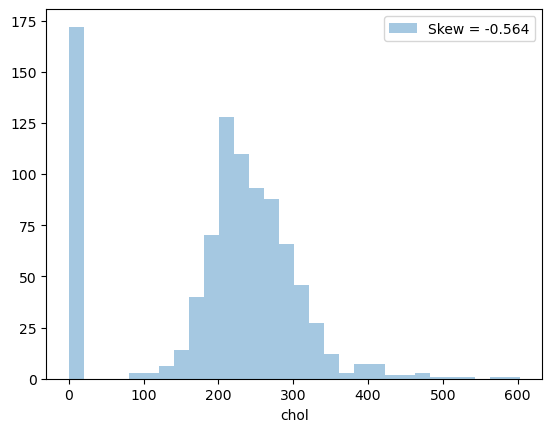

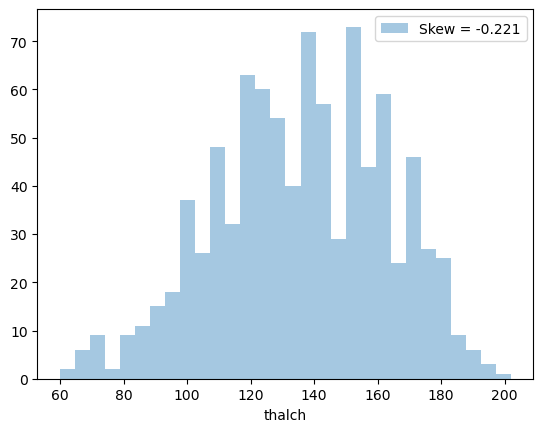

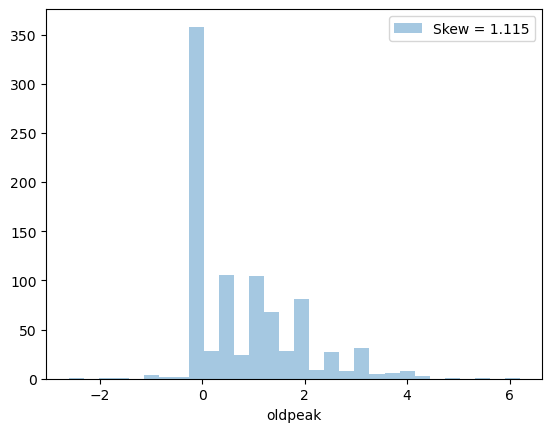

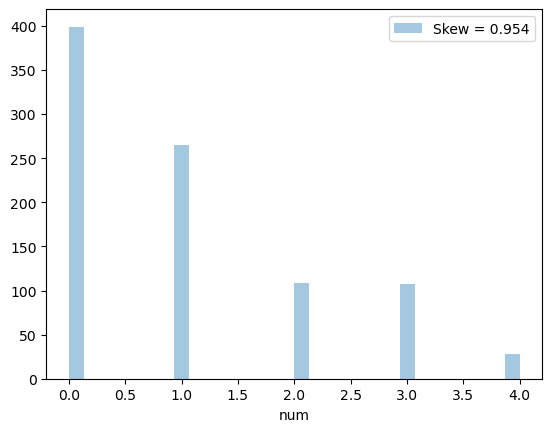

In [19]:
for feat in continous_features:
    skew = df[feat].skew()
    sns.distplot(df[feat],kde=False,label='Skew = %.3f' %(skew),bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed

In [20]:
from collections import Counter
# Detect observations with more than one outlier

def outlier_hunt(df):
    outlier_indices = []
    for col in df[continous_features]:
        #1 quartile (25%)
        Q1 = np.percentile(df[col],25)
        
        #3 quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        #Interquartile range (IQR)
        IQR = Q3 - Q1
        
        #Outlier step
        outlier_step = 1.5*IQR
        
        #Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>2)
    return multiple_outliers
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df))))

The dataset contains 0 observations with more than 2 outliers


##### Mmm hmm! there exists no observations with multiple outliers. 

Let's examine the boxplots for the several distributions

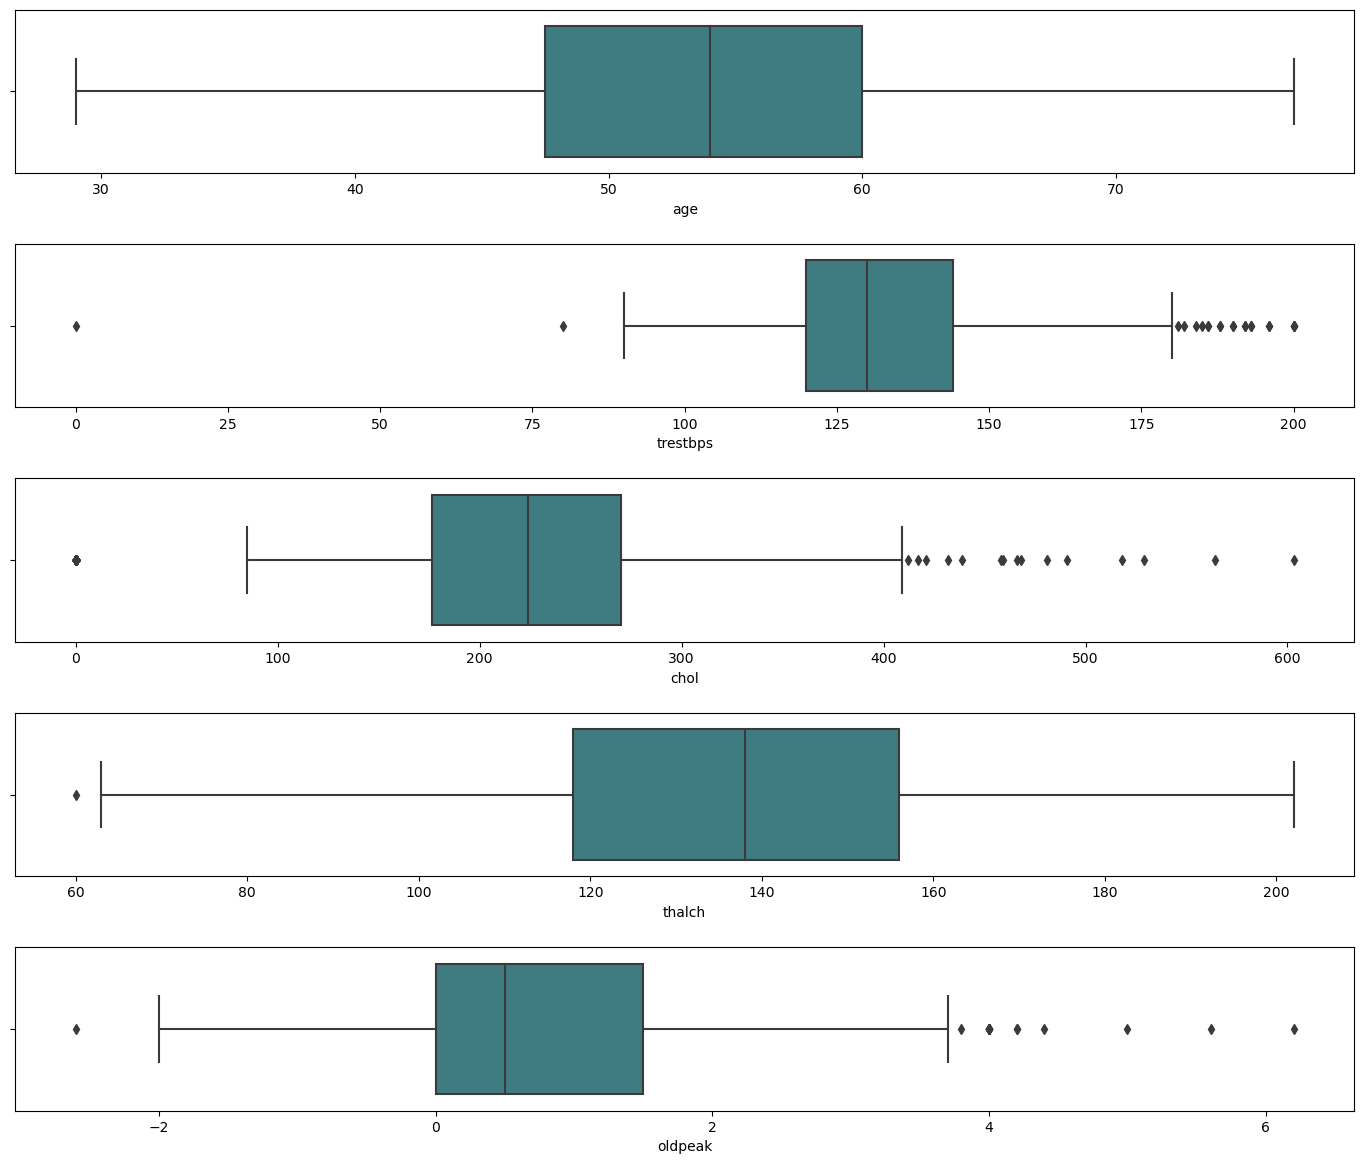

In [21]:
ot = df.copy()
ot.drop(columns='num',inplace=True)
fig, axes = plt.subplots(5,1, figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax = axes[0])
sns.boxplot(x='trestbps',data=ot,palette='crest',ax = axes[1])
sns.boxplot(x='chol',data=ot,palette='crest',ax = axes[2])
sns.boxplot(x='thalch',data=ot,palette='crest',ax = axes[3])
sns.boxplot(x='oldpeak',data=ot,palette='crest',ax = axes[4])
plt.tight_layout(pad=2.0)

In [22]:
continous_features

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

<Axes: >

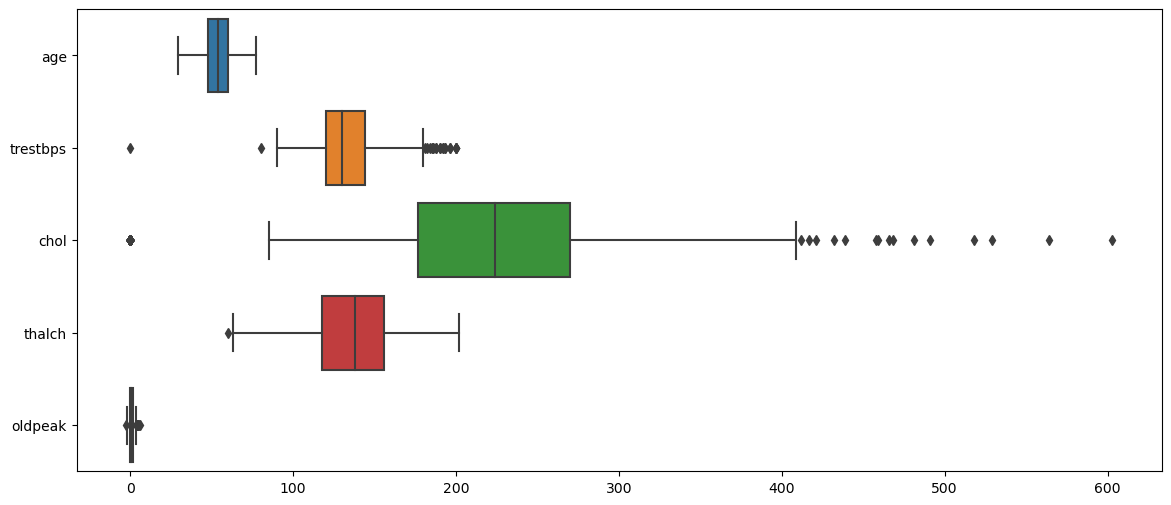

In [23]:
#outlier
continous = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(14,6))
sns.boxplot(data=ot[continous],orient='h')

#### Multivariate Analysis

Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

<Figure size 800x800 with 0 Axes>

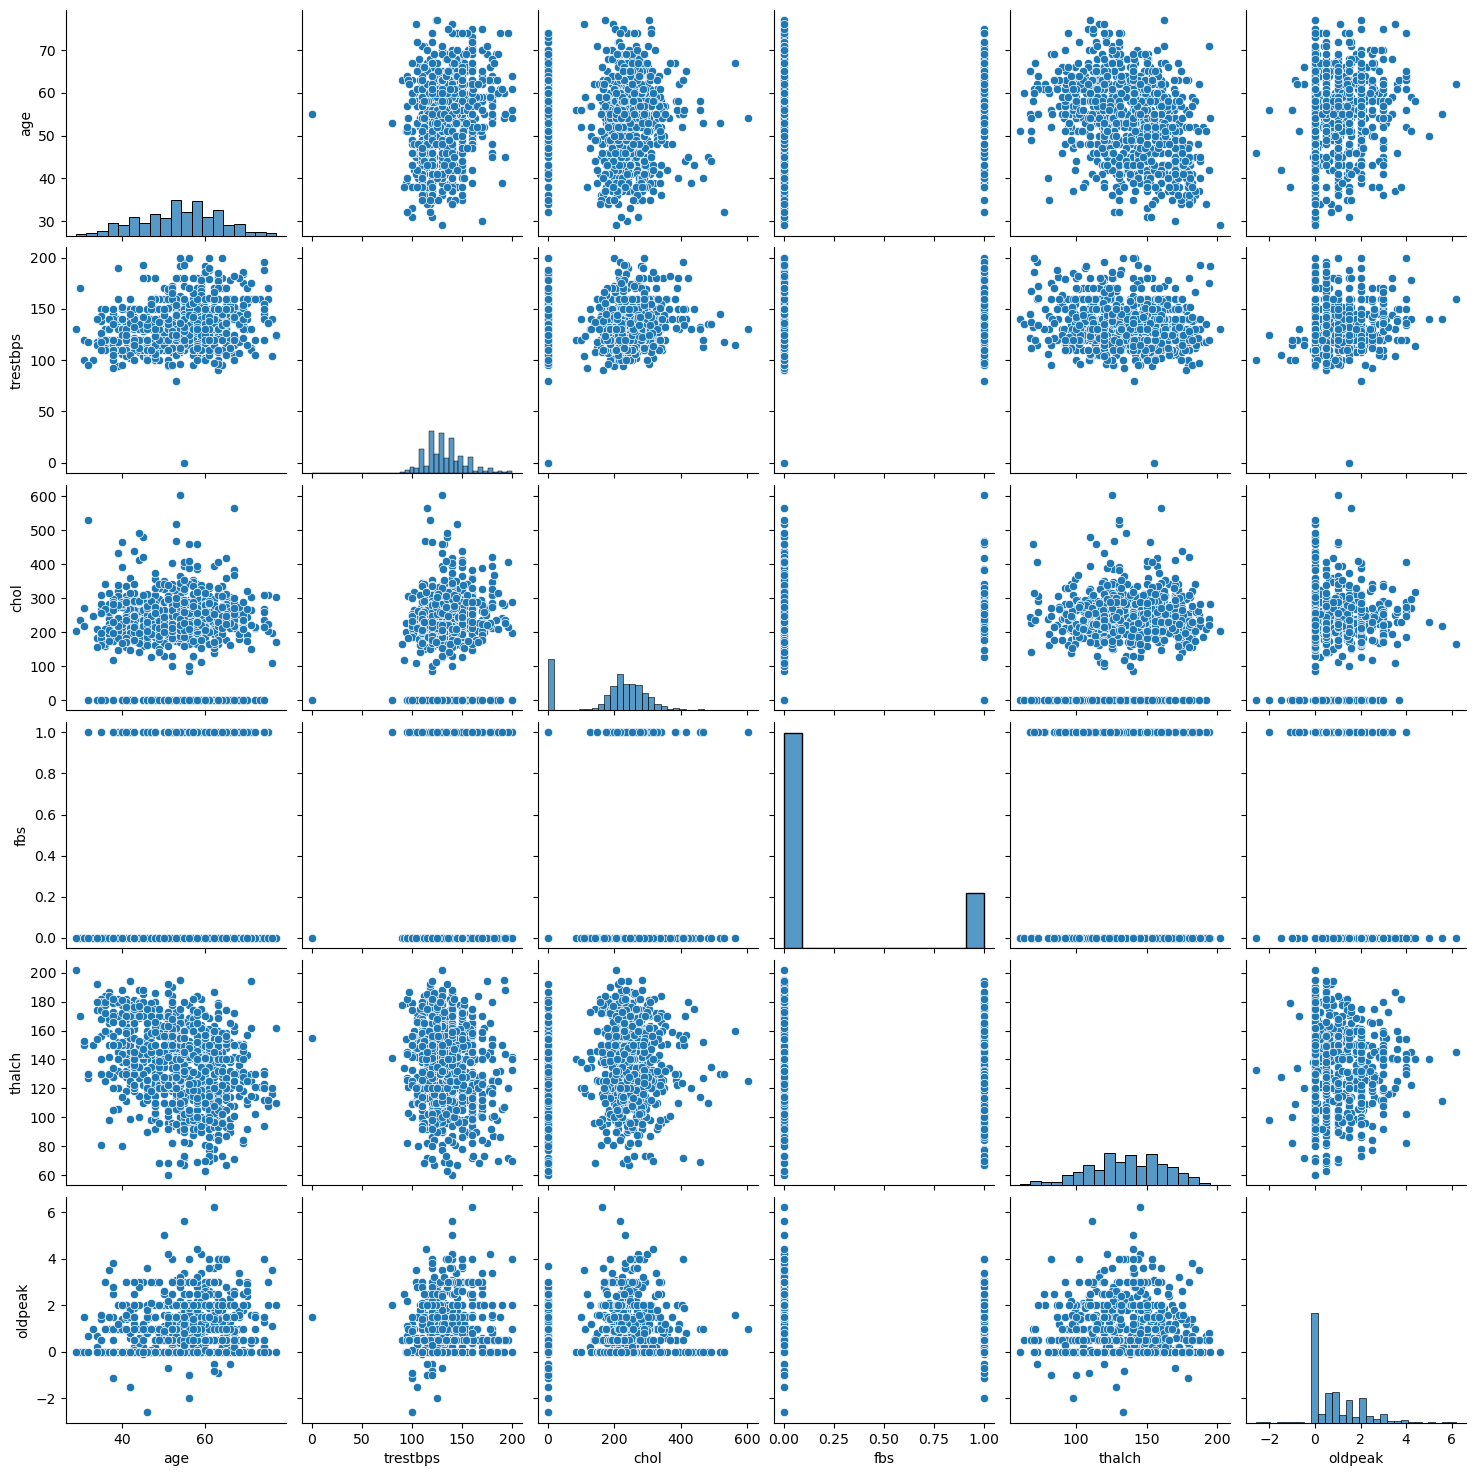

In [24]:
plt.figure(figsize=(8,8))
sns.pairplot(ot,palette='coolwarm')
plt.show()

<Axes: >

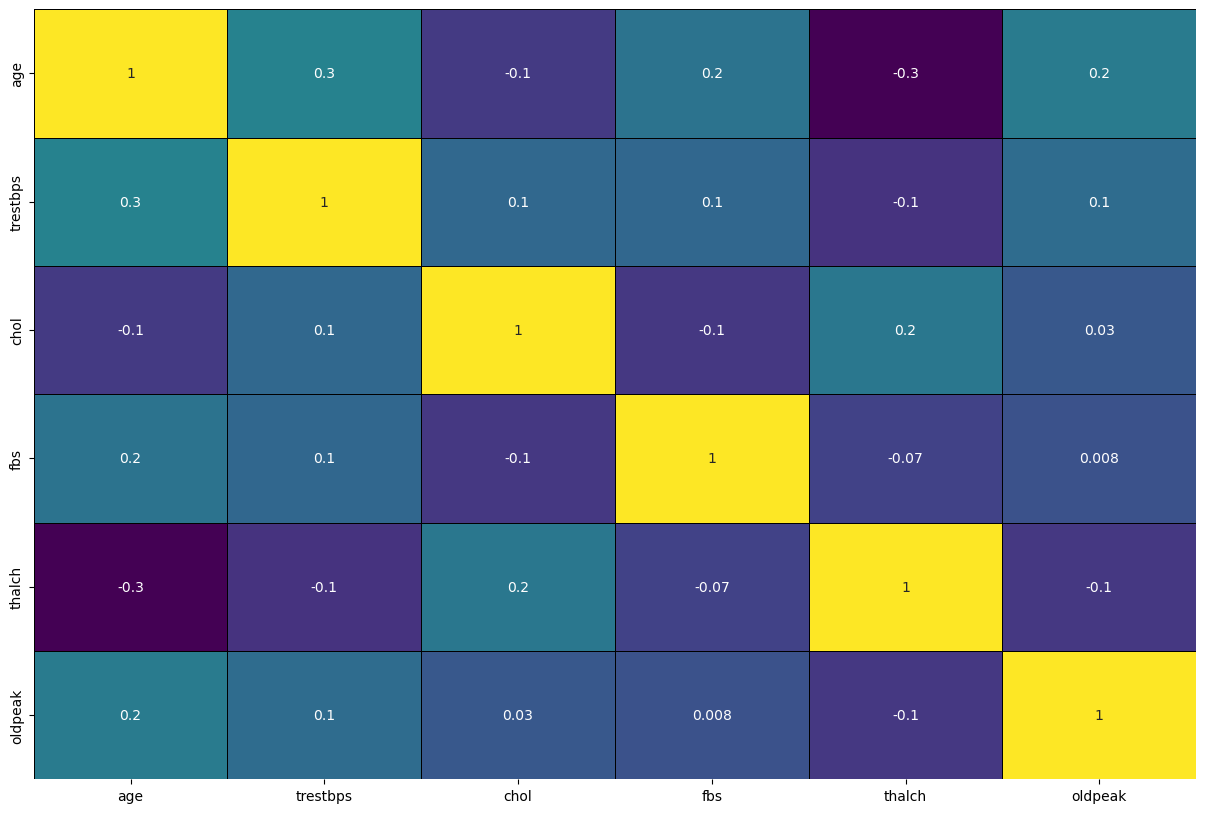

In [25]:
# Having a look at the correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(ot.corr(),annot=True,fmt='.1g',cmap='viridis',cbar=False,linewidth=0.5,linecolor='black')

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


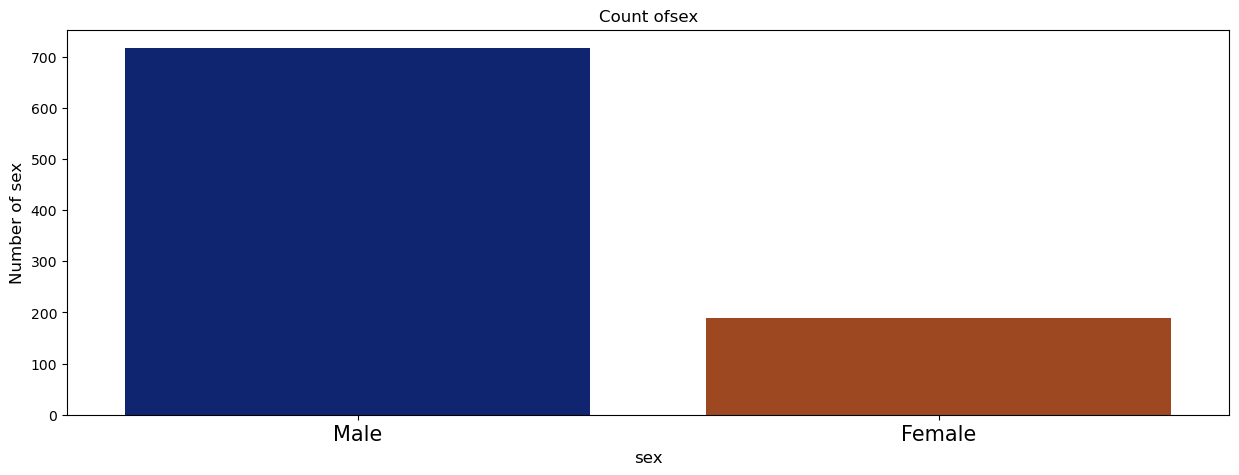

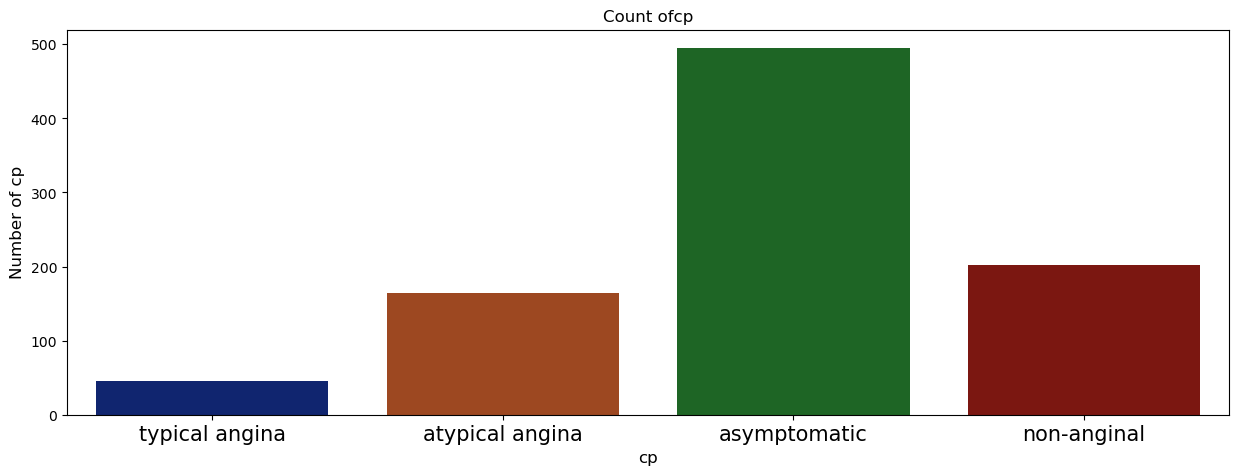

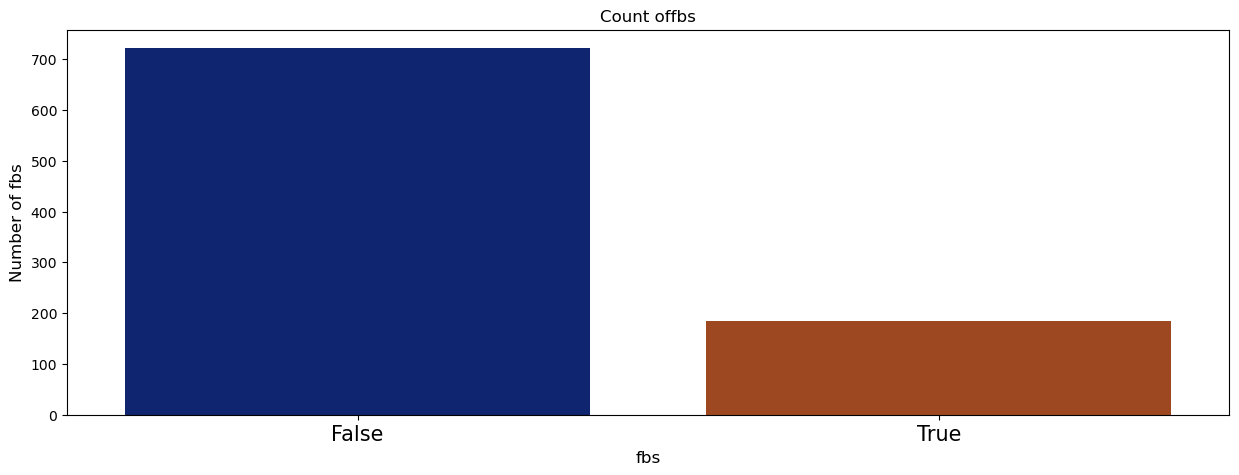

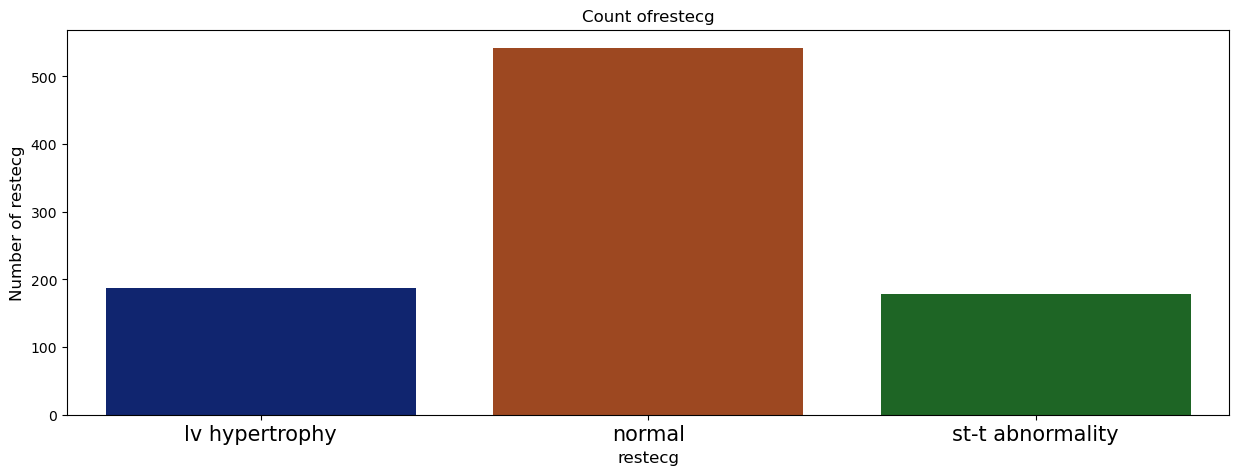

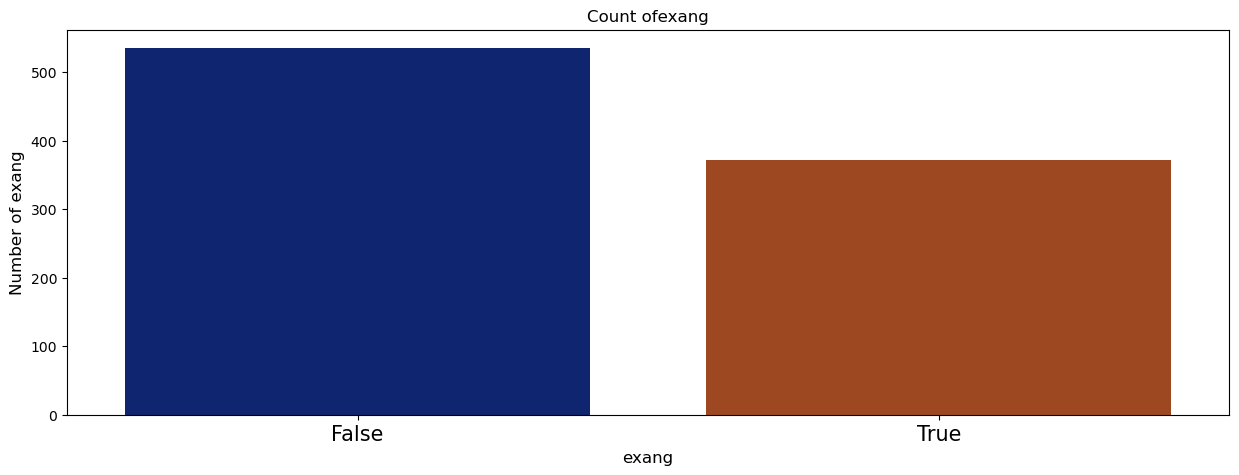

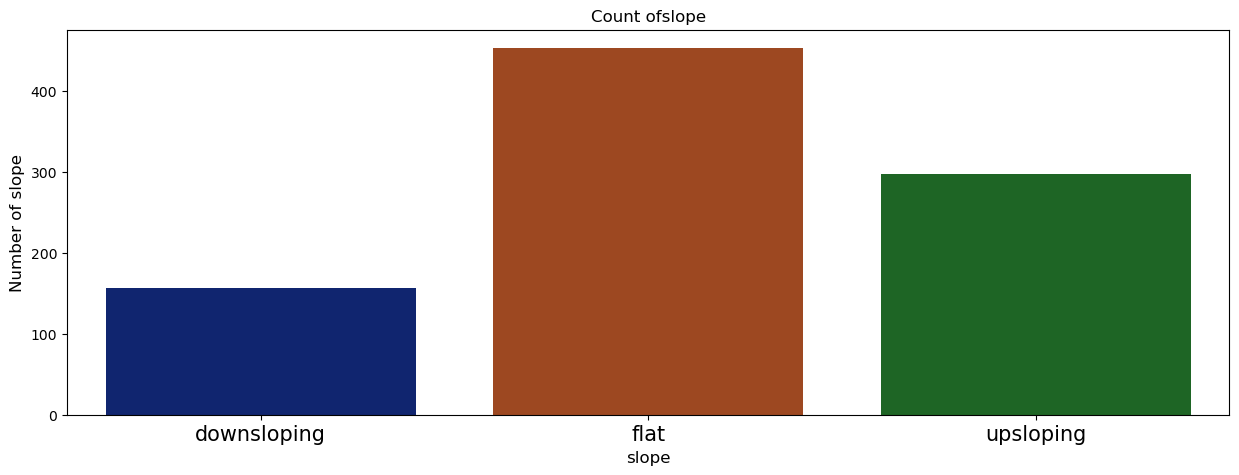

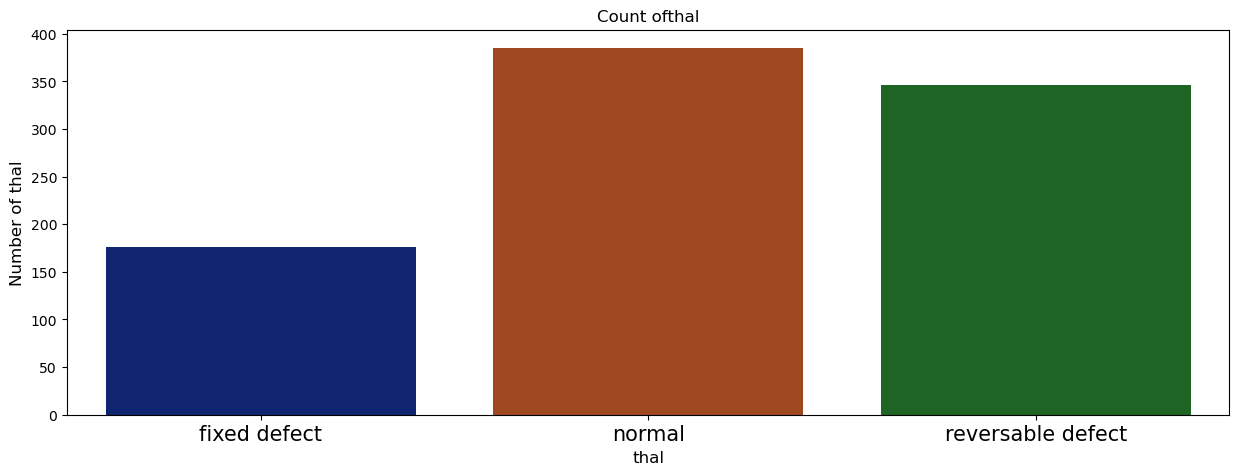

In [67]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15,5))
    unique = df[column].value_counts(ascending=True);
    
    plt.title('Count of'+ column)
    sns.countplot(data=df,x=column,palette='dark')
    
    plt.xticks(rotation = 0, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

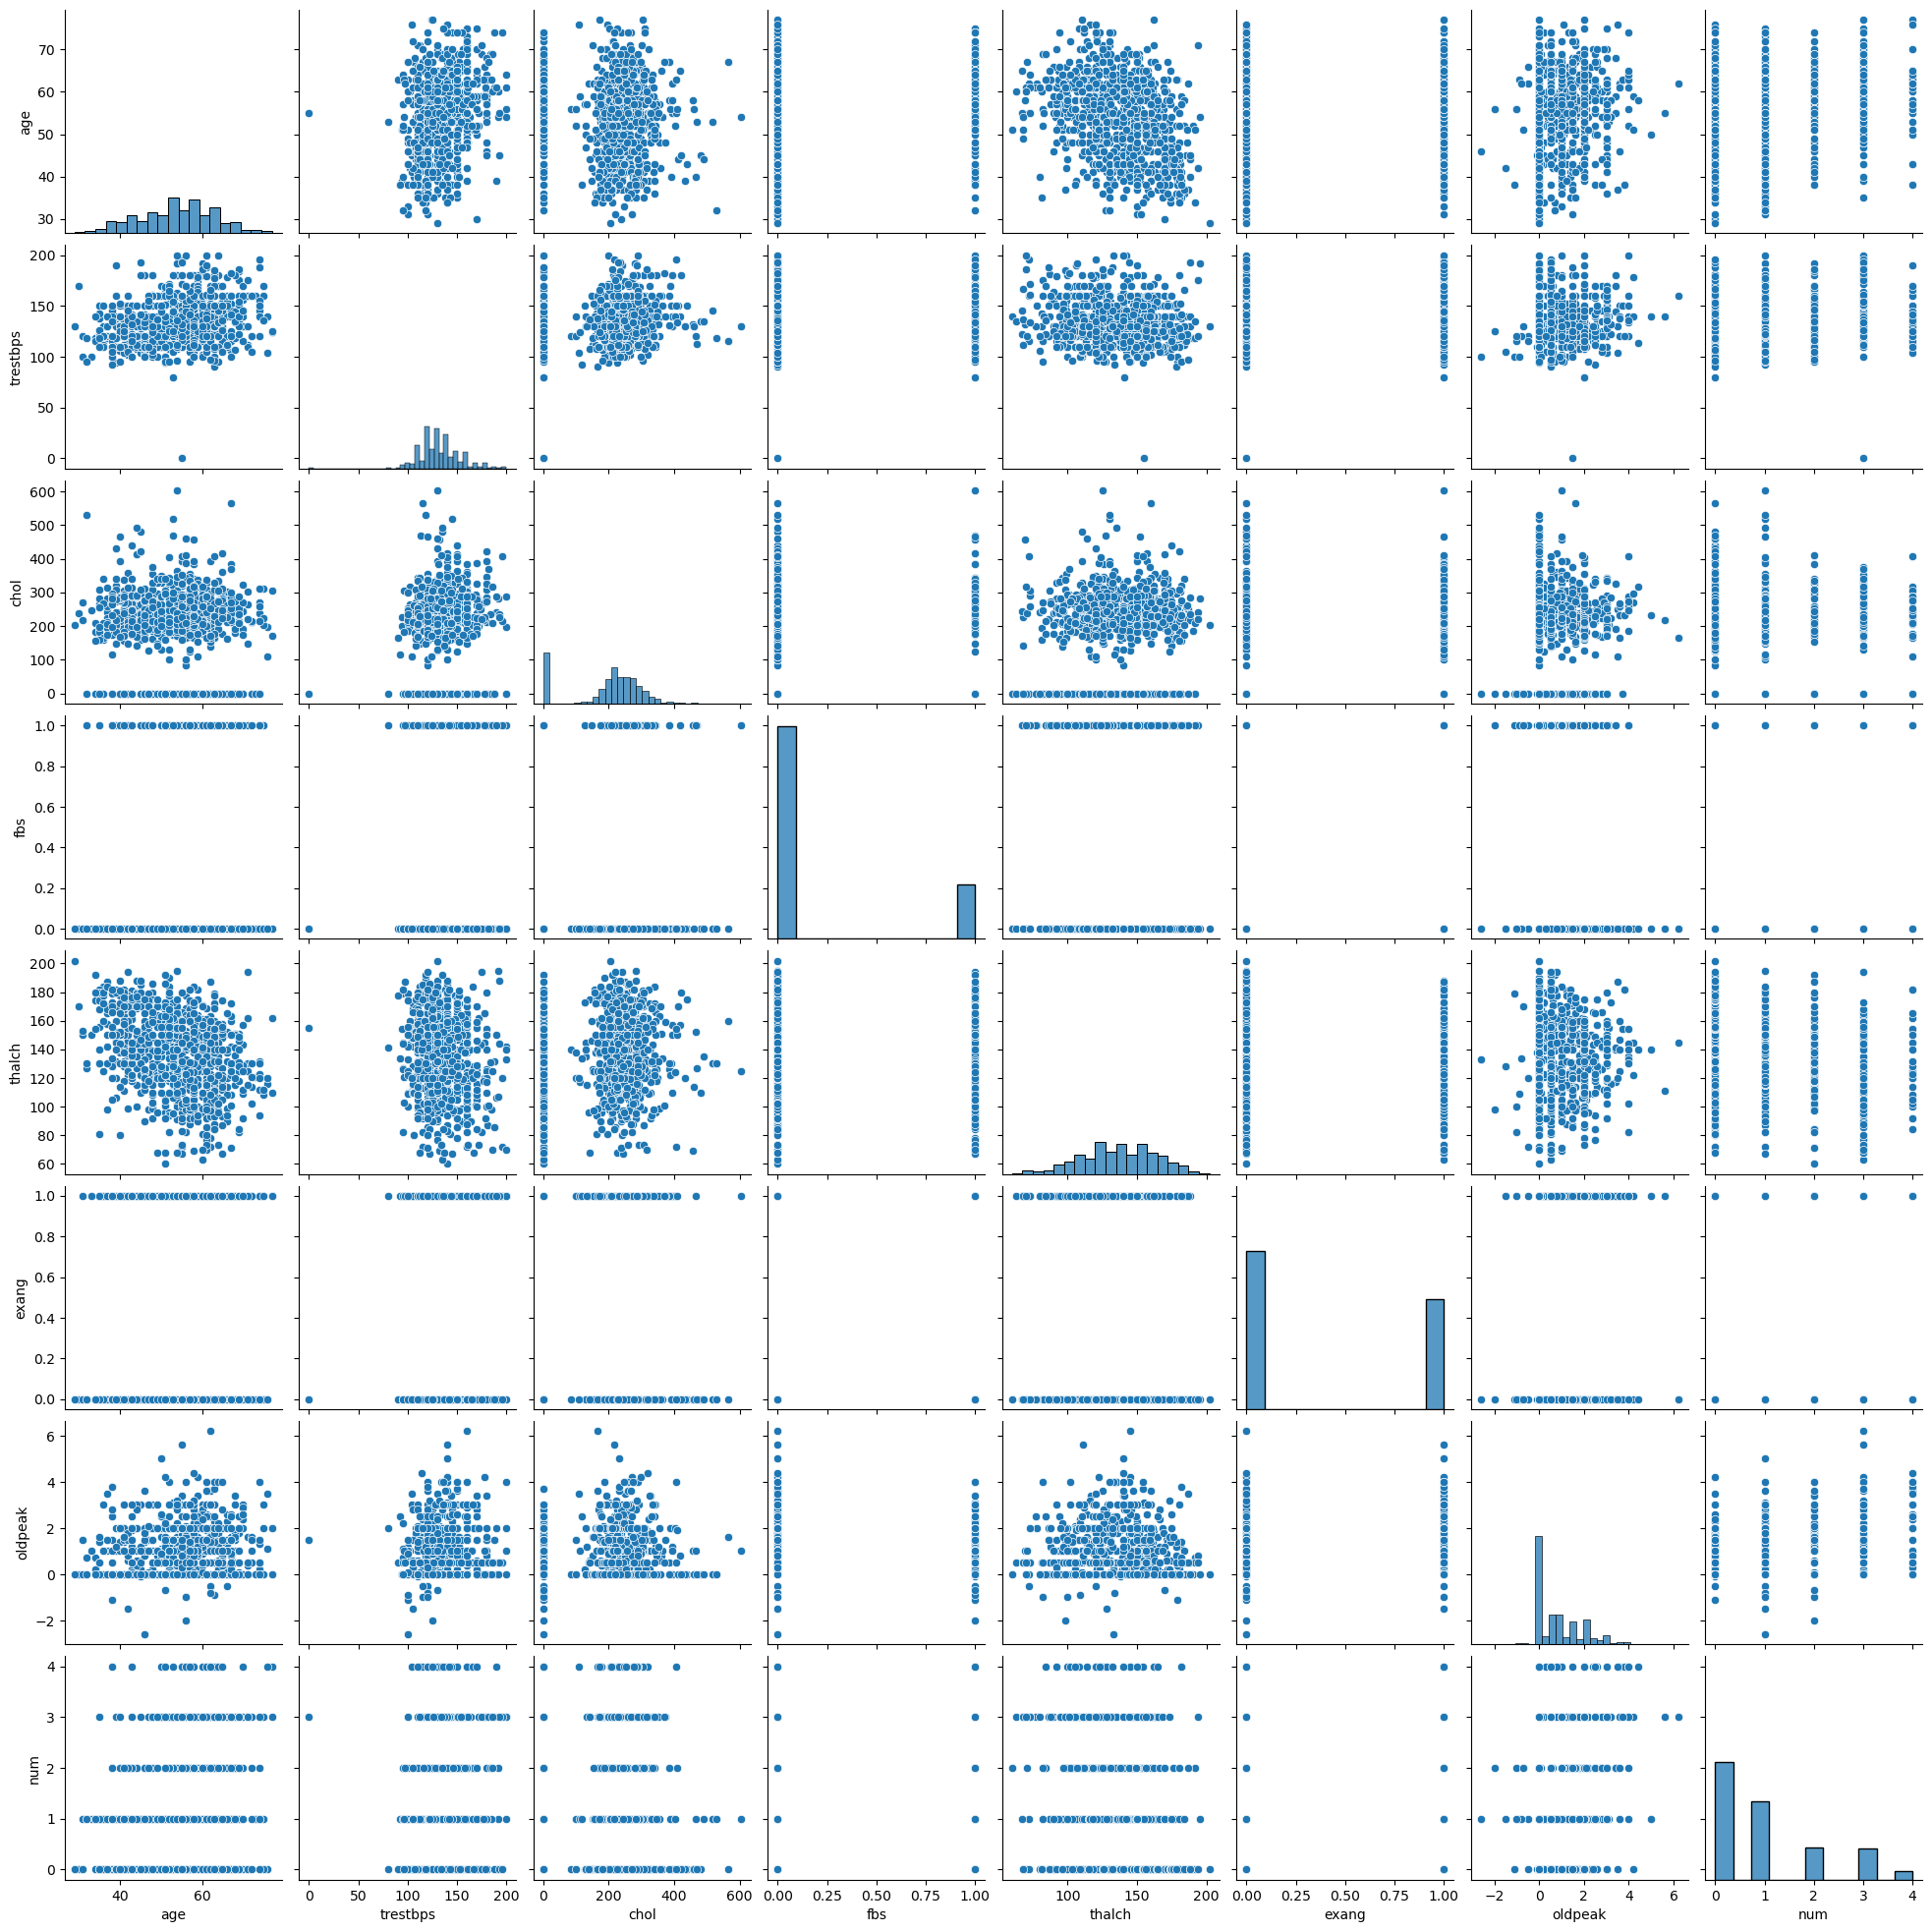

In [68]:
# let's plot pair plot to visualise the attributes all at once

sns.pairplot(data=df)

In [69]:
df[categorical_features].head(3)

sex               cp    fbs         restecg  exang        slope  \
0  Male   typical angina   True  lv hypertrophy  False  downsloping   
1  Male  atypical angina  False          normal  False         flat   
2  Male     asymptomatic  False          normal  False         flat   

           thal  
0  fixed defect  
1  fixed defect  
2  fixed defect

In [70]:
df['exang'].unique()

array([False,  True])

In [71]:
df['exang'] = df['exang'].replace({'FALSE':False,'TURE':True})

In [72]:
data = df.copy()
data.drop(columns=['num','num_cat'],axis=1,inplace=True)
data = pd.get_dummies(data)
data.head()

age  trestbps  chol    fbs  thalch  exang  oldpeak  sex_Female  sex_Male  \
0   63       145   233   True     150  False      2.3           0         1   
1   41       135   203  False     132  False      0.0           0         1   
2   57       140   192  False     148  False      0.4           0         1   
3   52       118   186  False     190  False      0.0           0         1   
4   57       110   201  False     126   True      1.5           0         1   

   cp_asymptomatic  ...  cp_typical angina  restecg_lv hypertrophy  \
0                0  ...                  1                       1   
1                0  ...                  0                       0   
2                1  ...                  0                       0   
3                0  ...                  1                       1   
4                1  ...                  0                       0   

   restecg_normal  restecg_st-t abnormality  slope_downsloping  slope_flat  \
0               0                         0                  1           0   
1               1                         0                  0           1   
2               1                         0                  0           1   
3               0                         0                  0           1   
4               1                         0                  0           1   

   slope_upsloping  thal_fixed defect  thal_normal  thal_reversable defect  
0                0                  1            0                       0  
1                0                  1            0                       0  
2                0                  1            0                       0  
3                0                  1            0                       0  
4                0                  1            0                       0  

[5 rows x 22 columns]

Text(0.5, 1.0, 'Correlation with num \n')

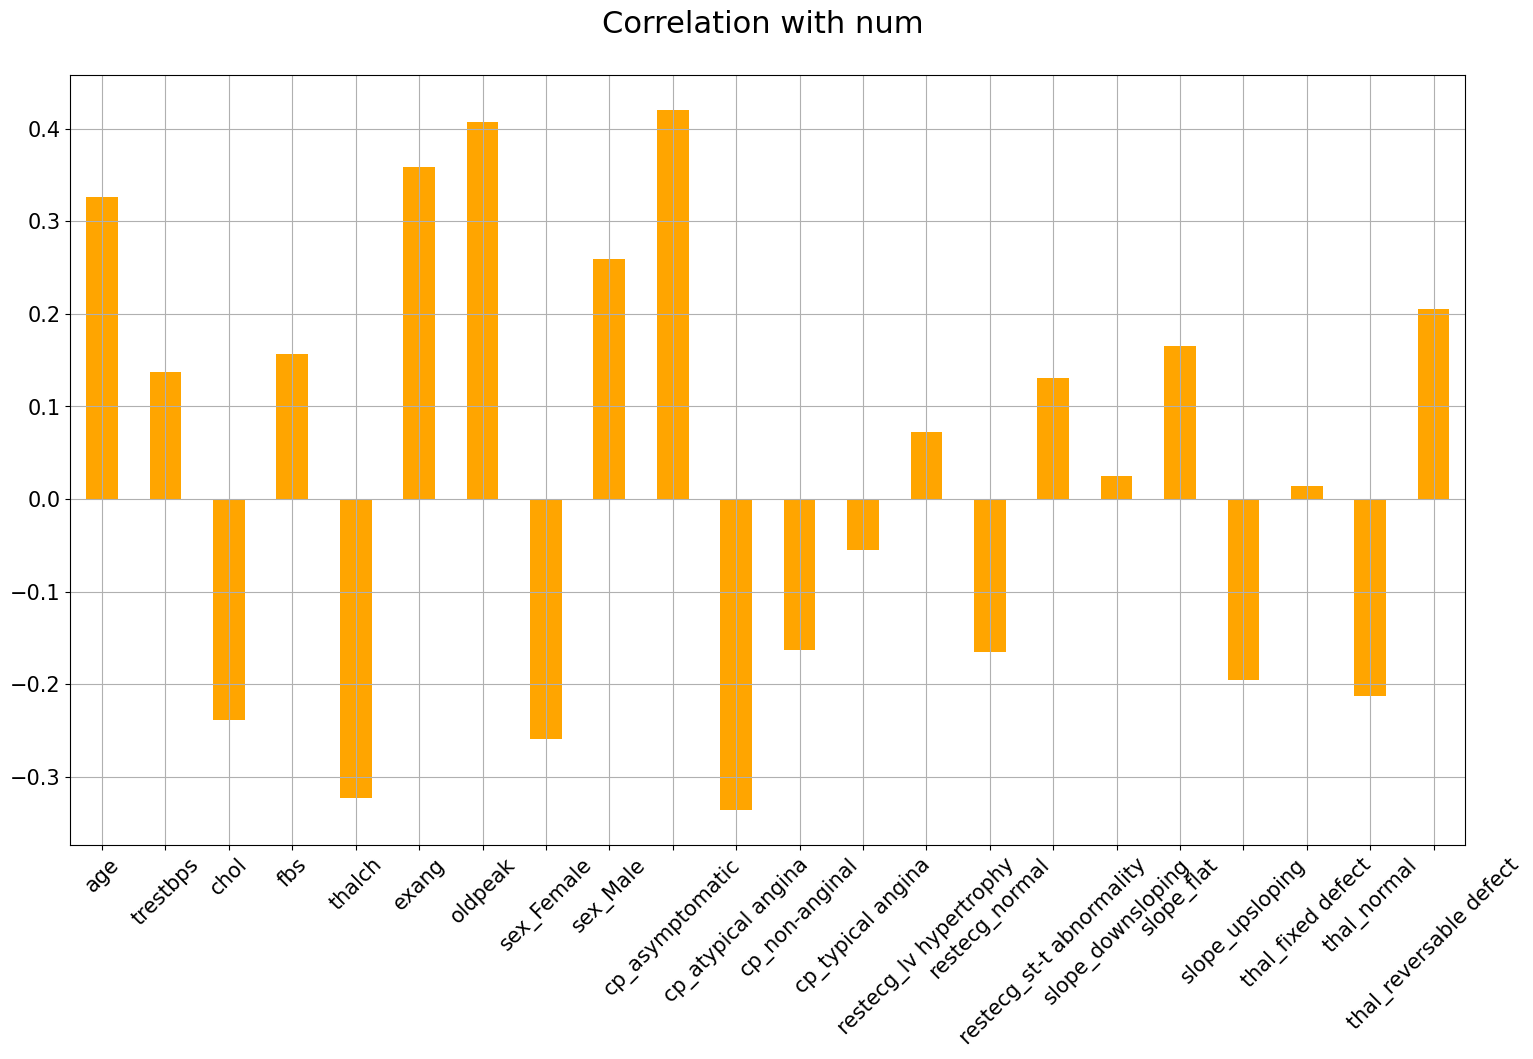

In [73]:
data1 = data.copy()

correlations = data1.corrwith(df.num)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations > 0].sort_values(ascending=False)
negative_correlations = correlations[correlations < 0].sort_values(ascending=False)

correlations.plot.bar(
figsize = (18,10),
fontsize =15,
color='orange',
rot = 45, grid=True
)
plt.title('Correlation with num \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

#### Checking for Imbalanced or balanced dataset with regards to the Target

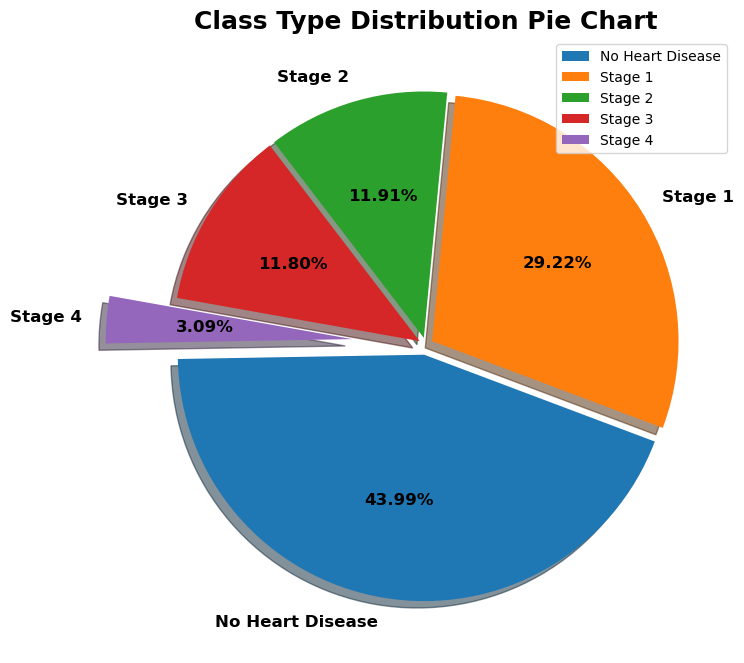

In [74]:
plt.figure(figsize = (12,8))
plt.pie(df['num_cat'].value_counts(),
       labels=df.num_cat.unique(),
       explode = [0.04,0.03,0.03,0.03,0.3],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##### Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

In [75]:
df.num_cat.value_counts()

No Heart Disease    399
Stage 1             265
Stage 2             108
Stage 3             107
Stage 4              28
Name: num_cat, dtype: int64

Text(0.5, 1.0, 'Stages of Heart Diseases')

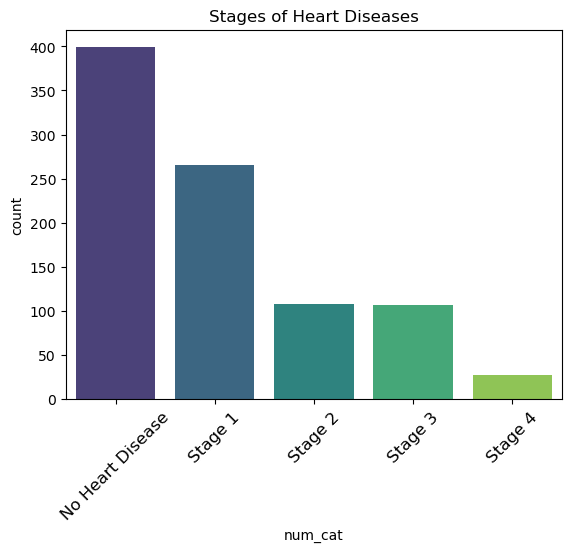

In [76]:
sns.countplot(x='num_cat',data=df,palette='viridis',order=df['num_cat'].value_counts().index)
plt.xticks(fontsize=12,rotation=45)
plt.title('Stages of Heart Diseases')

### Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

### Feature Selection Technique

#### Data Pre-Processing

In [77]:
data=df.copy()
data.drop(columns=['num','num_cat'],inplace=True)
data = pd.get_dummies(data)
data['exang'] = data['exang'].replace({True:1,False:0})
data['fbs'] = data['fbs'].replace({True:1,False:0})
data.head(2)


age  trestbps  chol  fbs  thalch  exang  oldpeak  sex_Female  sex_Male  \
0   63       145   233    1     150      0      2.3           0         1   
1   41       135   203    0     132      0      0.0           0         1   

   cp_asymptomatic  ...  cp_typical angina  restecg_lv hypertrophy  \
0                0  ...                  1                       1   
1                0  ...                  0                       0   

   restecg_normal  restecg_st-t abnormality  slope_downsloping  slope_flat  \
0               0                         0                  1           0   
1               1                         0                  0           1   

   slope_upsloping  thal_fixed defect  thal_normal  thal_reversable defect  
0                0                  1            0                       0  
1                0                  1            0                       0  

[2 rows x 22 columns]

In [78]:
data['num'] = df.num
data.head(3)

age  trestbps  chol  fbs  thalch  exang  oldpeak  sex_Female  sex_Male  \
0   63       145   233    1     150      0      2.3           0         1   
1   41       135   203    0     132      0      0.0           0         1   
2   57       140   192    0     148      0      0.4           0         1   

   cp_asymptomatic  ...  restecg_lv hypertrophy  restecg_normal  \
0                0  ...                       1               0   
1                0  ...                       0               1   
2                1  ...                       0               1   

   restecg_st-t abnormality  slope_downsloping  slope_flat  slope_upsloping  \
0                         0                  1           0                0   
1                         0                  0           1                0   
2                         0                  0           1                0   

   thal_fixed defect  thal_normal  thal_reversable defect  num  
0                  1            0                       0    0  
1                  1            0                       0    0  
2                  1            0                       0    0  

[3 rows x 23 columns]

In [79]:
# split into input (X) and output (y) variables
X = data.iloc[:,:-1]
y = data.num

In [80]:
# Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, f_classif

In [81]:
# feature extraction
test = SelectKBest(score_func=f_classif,k=4)
fit = test.fit(X,y)

In [82]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [83]:
score_df = pd.DataFrame(list(zip(scores,X.columns)),
                       columns=['Score','Feature'])
score_df.sort_values(by='Score',ascending=False,inplace=True)
score_df

Score                   Feature
9   81.158466           cp_asymptomatic
5   52.899717                     exang
6   47.961274                   oldpeak
10  42.235944        cp_atypical angina
4   34.715455                    thalch
0   28.109894                       age
7   23.883265                sex_Female
8   23.883265                  sex_Male
2   19.289626                      chol
18  13.914302           slope_upsloping
20  12.813203               thal_normal
17  12.482870                slope_flat
11  11.626353            cp_non-anginal
21  11.133121    thal_reversable defect
3    7.586668                       fbs
14   7.425713            restecg_normal
15   4.591602  restecg_st-t abnormality
1    4.396123                  trestbps
13   3.651558    restecg_lv hypertrophy
16   1.252851         slope_downsloping
12   0.767950         cp_typical angina
19   0.589137         thal_fixed defect

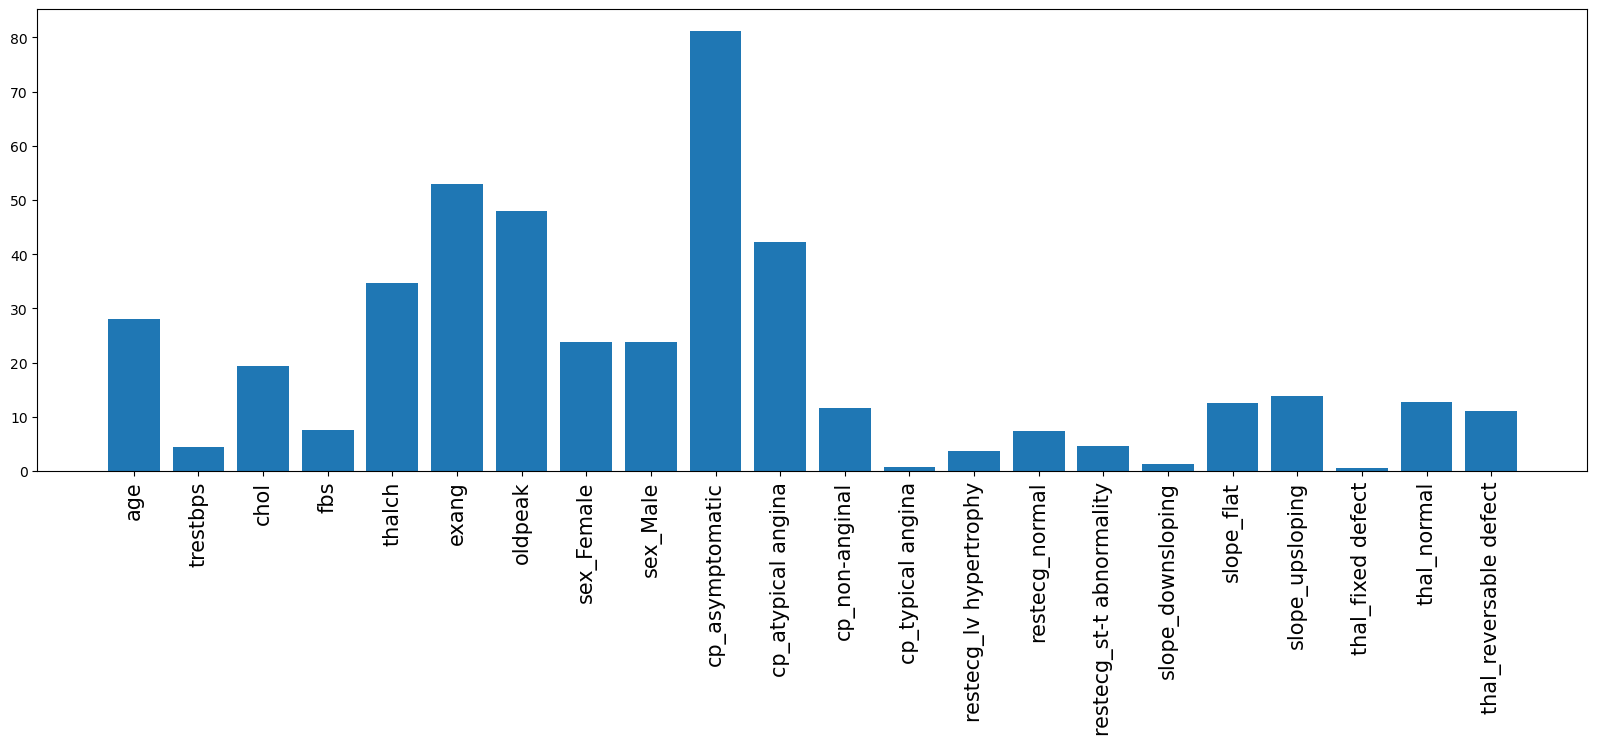

In [84]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

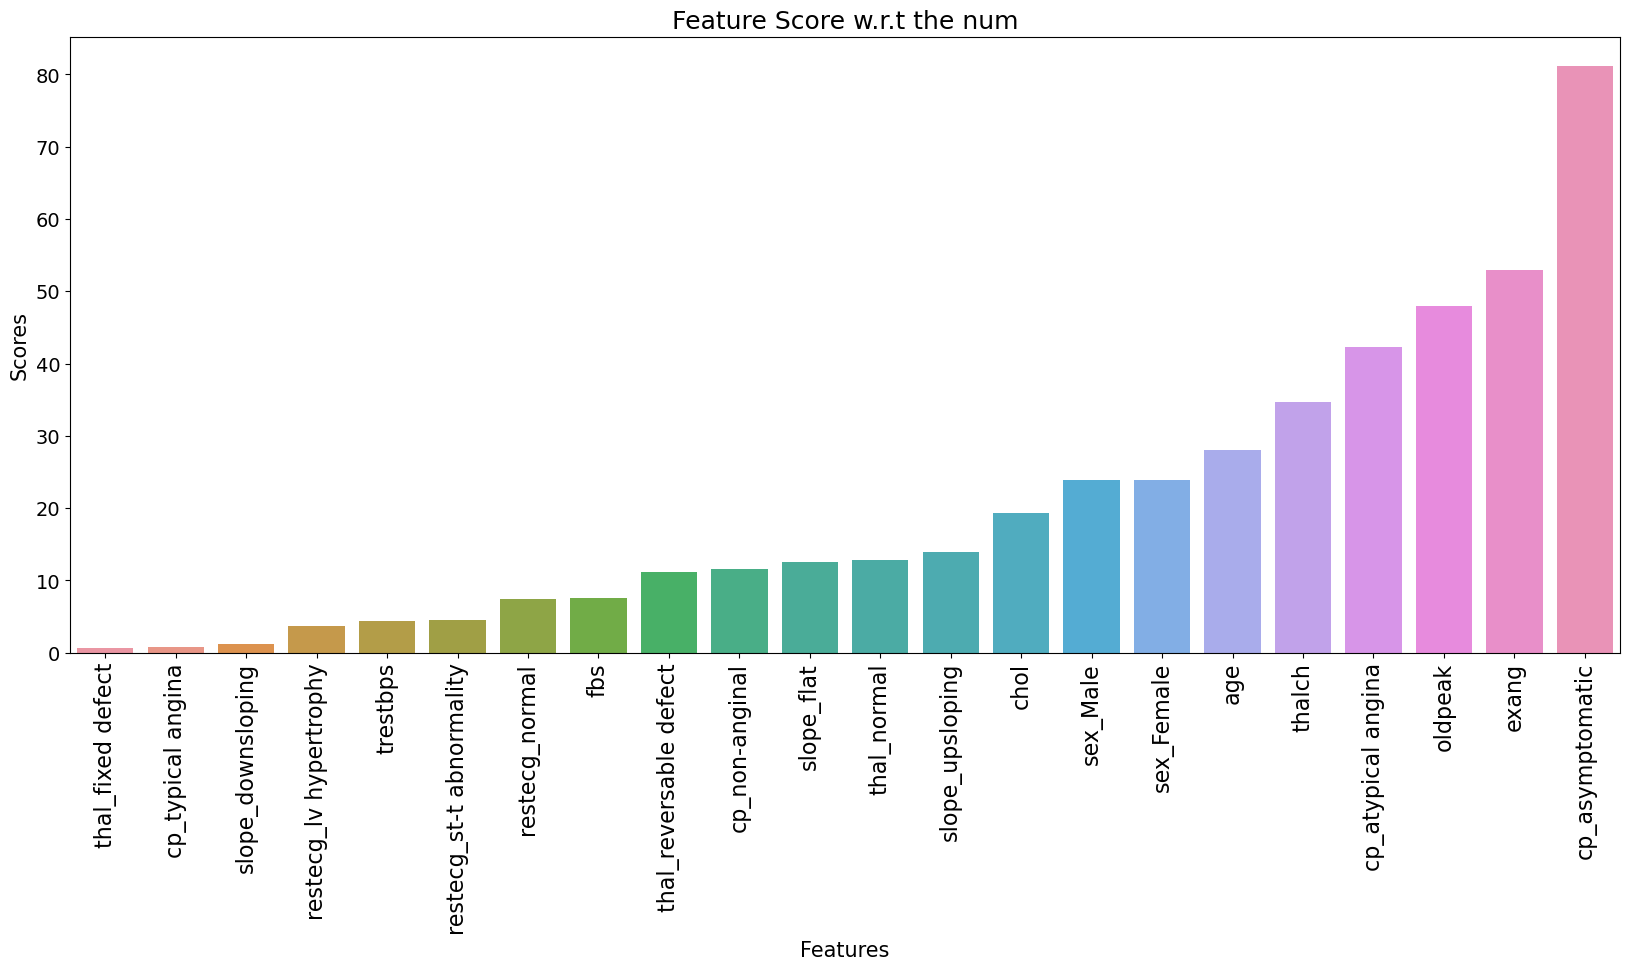

In [85]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the num", size=18)
plt.show()

In [86]:
model_data = data[['cp_asymptomatic','exang','oldpeak','cp_atypical angina','thalch','age','cp_non-anginal','cp_typical angina','num']]
model_data.head(2)

cp_asymptomatic  exang  oldpeak  cp_atypical angina  thalch  age  \
0                0      0      2.3                   0     150   63   
1                0      0      0.0                   1     132   41   

   cp_non-anginal  cp_typical angina  num  
0               0                  1    0  
1               0                  0    0

### Test Train Split with Imbalanced Dataset

***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

In [87]:
x = model_data.drop('num',axis=1)
y = model_data['num']

In [88]:
y.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [89]:
from sklearn.model_selection import StratifiedKFold

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 360, 1: 238, 2: 97, 3: 97, 4: 25}) Testing Data Counter({0: 39, 1: 27, 2: 11, 3: 10, 4: 3})


In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [91]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 279, 1: 185, 3: 75, 2: 75, 4: 20}) Testing Data Counter({0: 120, 1: 80, 2: 33, 3: 32, 4: 8})


In [92]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (634, 8)
Shape of X_test:  (273, 8)
Shape of y_train:  (634,)
Shape of y_test (273,)


## 6. When to stop splitting?
You must be asking this question to yourself that when do we stop growing our tree? Usually, real-world datasets have a large number of features, which will result in a large number of splits, which in turn gives a huge tree. Such trees take time to build and can lead to overfitting. That means the tree will give very good accuracy on the training dataset but will give bad accuracy in test data.

There are many ways to tackle this problem through hyperparameter tuning. We can set the maximum depth of our decision tree using the <b>max_depth parameter</b>. The more the value of <b>max_depth</b>, the more complex your tree will be. The training error will off-course decrease if we increase the <b>max_depth</b> value but when our test data comes into the picture, we will get a very bad accuracy. Hence you need a value that will not overfit as well as underfit our data and for this, you can use GridSearchCV.

Another way is to set the minimum number of samples for each spilt. It is denoted by <b>min_samples_split</b>. Here we specify the minimum number of samples required to do a spilt. For example, we can use a minimum of 10 samples to reach a decision. That means if a node has less than 10 samples then using this parameter, we can stop the further splitting of this node and make it a leaf node.

There are more hyperparameters such as :

<b>min_samples_leaf</b> – `represents the minimum number of samples required to be in the leaf node. The more you increase the number, the more is the possibility of overfitting.`

<b>max_features</b> – `it helps us decide what number of features to consider when looking for the best split.`
### Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [94]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_X, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_X, train_y)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=True)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 55.20%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1          2     3     4  accuracy  \
precision    0.675799    0.421512   0.285714   0.0   0.0   0.55202   
recall       0.822222    0.609244   0.103093   0.0   0.0   0.55202   
f1-score     0.741855    0.498282   0.151515   0.0   0.0   0.55202   
support    360.000000  238.000000  97.000000  97.0  25.0   0.55202   

            macro avg  weighted avg  
precision    0.276605      0.454494  
recall       0.306912      0.552020  
f1-score     0.278330      0.490031  
support    817.000000    817.000000  
_______________________________________________
Confusion Matrix: 
 [[296  56   8   0   0]
 [ 88 145   5   0   0]
 [ 26  61  10   0   0]
 [ 22  65  10   0   

In [95]:
# Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, train_X, train_y, cv=skf)
print(results.mean())

0.42487202649804273


In [96]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(train_X,train_y)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [97]:
 grid.best_score_

0.5349593495934959

In [98]:
predict_output = model.predict(test_X)
accuracy_test = accuracy_score(test_y,predict_output)
accuracy_test

0.5888888888888889

              precision    recall  f1-score   support

           0       0.61      0.92      0.73        39
           1       0.71      0.56      0.63        27
           2       0.00      0.00      0.00        11
           3       0.20      0.20      0.20        10
           4       0.00      0.00      0.00         3

    accuracy                           0.59        90
   macro avg       0.30      0.34      0.31        90
weighted avg       0.50      0.59      0.53        90



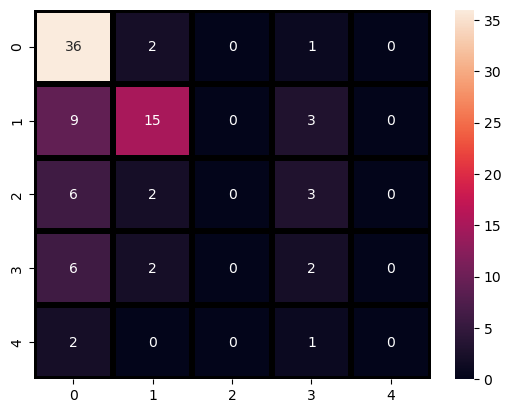

In [99]:
sns.heatmap(confusion_matrix(test_y, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(test_y,predict_output))

### Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [100]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 56.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1          2     3     4  accuracy  \
precision    0.714286    0.434629   0.305556   0.0   0.0  0.566246   
recall       0.806452    0.664865   0.146667   0.0   0.0  0.566246   
f1-score     0.757576    0.525641   0.198198   0.0   0.0  0.566246   
support    279.000000  185.000000  75.000000  75.0  20.0  0.566246   

            macro avg  weighted avg  
precision    0.290894      0.477301  
recall       0.323597      0.566246  
f1-score     0.296283      0.510208  
support    634.000000    634.000000  
_______________________________________________
Confusion Matrix: 
 [[225  52   2   0   0]
 [ 54 123   8   0   0]
 [ 17  47  11   0   0]
 [ 15  51   9   0   

In [101]:
# Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf)
print(results.mean())

0.4051835317460317


In [102]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(x_train,y_train)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [103]:
grid.best_score_

0.5472718253968254

In [104]:
predict_output = model.predict(x_test)
accuracy_test = accuracy_score(y_test,predict_output)
accuracy_test

0.5347985347985348

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       120
           1       0.39      0.75      0.52        80
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00         8

    accuracy                           0.53       273
   macro avg       0.22      0.29      0.25       273
weighted avg       0.43      0.53      0.47       273



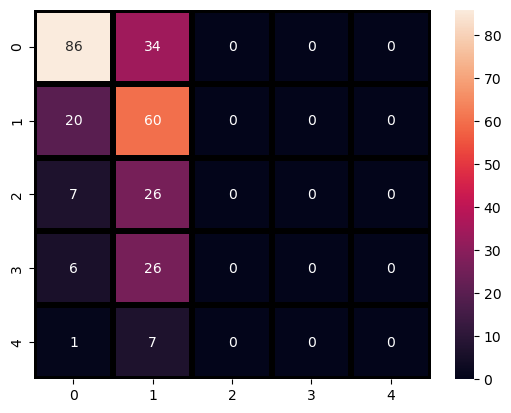

In [105]:
sns.heatmap(confusion_matrix(y_test, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,predict_output))

#### Observation: 
+ In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

### Handling imbalance data using SMOTE based techniques

#### Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. In this article, I am specifically covering some special data augmentation oversampling techniques: SMOTE and its related counterparts.

+ ##### <b>SMOTE: Synthetic Minority Oversampling Technique</b>
+ SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

+ <b>Working Procedure</b>:
At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. 

Though this algorithm is quite useful, it has few drawbacks associated with it.

+ i) The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.

+ ii) SMOTE tends to create a large no. of noisy data points in feature space.

In [106]:
x = model_data.drop(['num'], axis=1)
y = model_data['num']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [107]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (634, 8)
Shape of X_test:  (273, 8)
Shape of y_train:  (634,)
Shape of y_test (273,)


### SMOTE Oversampling technique


In [108]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 279, 1: 185, 3: 75, 2: 75, 4: 20})
After Counter({0: 279, 3: 279, 2: 279, 4: 279, 1: 279})


### ADASYN: Adaptive Synthetic Sampling Approach

ADASYN is a generalized form of the SMOTE algorithm. This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is the major difference compared to SMOTE.

<b>Working Procedure</b>:
From the dataset, the total no. of majority N– and minority N+ are captured respectively. Then we preset the threshold value, dth for the maximum degree of class imbalance. Total no. of synthetic samples to be generated, G = (N– – N+) x β. Here, β = (N+/ N–).\
For every minority sample xi, KNN’s are obtained using Euclidean distance, and ratio ri is calculated as Δi/k and further normalized as rx <= ri / ∑ rᵢ .\
Thereafter, the total synthetic samples for each xi will be, gi = rx x G. Now we iterate from 1 to gi to generate samples the same way as we did in SMOTE.

In [109]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 279, 1: 185, 3: 75, 2: 75, 4: 20})
After Counter({3: 296, 0: 279, 2: 279, 4: 277, 1: 271})


### Hybridization: SMOTE + Tomek Links
Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links

In [110]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 279, 1: 185, 3: 75, 2: 75, 4: 20})
After Counter({4: 261, 3: 260, 2: 246, 1: 244, 0: 238})


### Hybridization: SMOTE + ENN
SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.

<b>Python Code for SMOTE + ENN algorithm:

In [111]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 279, 1: 185, 3: 75, 2: 75, 4: 20})
After Counter({4: 154, 3: 146, 2: 112, 1: 54, 0: 44})


### Performance Analysis after Resampling

In [112]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [113]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    #print('AUC-ROC')
    #print('='*60)
    #print(roc_auc_score(y_test, y_prob[:,1], multi_class='ovo'))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [114]:
model_params = {
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']
        }
        
    }
    
}

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with ACTUAL
Confusion Matrix
[[91 21  3  5  0]
 [22 49  5  4  0]
 [ 3 23  5  2  0]
 [ 7 14  7  4  0]
 [ 1  3  3  1  0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       120
           1       0.45      0.61      0.52        80
           2       0.22      0.15      0.18        33
           3       0.25      0.12      0.17        32
           4       0.00      0.00      0.00         8

    accuracy                           0.55       273
   macro avg       0.33      0.33      0.32       273
weighted avg       0.51      0.55      0.52       273
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with SMOTE
Confusion Matrix
[[75 19 11 13  2]
 [23 28 14 11  4]
 [ 4 10  5 11  3]
 [ 7  8  6  8  3]
 [ 1  4  1  1  1]] 

Classification Report
              precision    recall  f1-score   support

           0     

#### As the results can be compared, SMOTE TOMEK Hybridization technique gave the best results we are going to use it further 

In [116]:
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=0)
x_train_smtom, y_train_smtom = smtom.fit_resample(x, y)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 399, 1: 265, 2: 108, 3: 107, 4: 28})
After Counter({4: 373, 2: 369, 3: 366, 0: 353, 1: 348})


In [117]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,random_state=0, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({4: 373, 2: 369, 3: 366, 0: 353, 1: 348})
After Counter({4: 261, 2: 258, 3: 256, 0: 247, 1: 244})
Shape of X_train:  (1266, 8)
Shape of X_test:  (543, 8)
Shape of y_train:  (1266,)
Shape of y_test (543,)


## Pruning
It is another method that can help us avoid overfitting. It helps in improving the performance of the tree by cutting the nodes or sub-nodes which are not significant. It removes the branches which have very low importance.

The performance of a tree can be further increased by pruning. It involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.

Pruning can start at either root or the leaves. The simplest method of pruning starts at leaves and removes each node with most popular class in that leaf, this change is kept if it doesn't deteriorate accuracy. Its also called **reduced error pruning**. More sophisticated pruning methods can be used such as **cost complexity pruning** where a learning parameter <b>(alpha)</b> is used to weigh whether nodes can be removed based on the size of the sub-tree. This is also known as **weakest link pruning.**

Pruning: Getting an Optimal Decision tree
Pruning is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree.

A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning. There are mainly two types of tree pruning technology used:

+ Cost Complexity Pruning
+ Reduced Error Pruning.

There are mainly 2 ways for pruning:

(i) <b>Pre-pruning</b> – `we can stop growing the tree earlier, which means we can prune/remove/cut a node if it has low importance while growing the tree.`

(ii) <b>Post-pruning</b> – `once our tree is built to its depth, we can start pruning the nodes based on their significance.`

In [118]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 6))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 6)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 51.90%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3           4  \
precision    0.804762    0.348291    0.413793    0.592593    0.674208   
recall       0.684211    0.668033    0.372093    0.312500    0.570881   
f1-score     0.739606    0.457865    0.391837    0.409207    0.618257   
support    247.000000  244.000000  258.000000  256.000000  261.000000   

           accuracy    macro avg  weighted avg  
precision  0.518957     0.566729      0.567290  
recall     0.518957     0.521544      0.518957  
f1-score   0.518957     0.523354      0.522605  
support    0.518957  1266.000000   1266.000000  
_______________________________________________
Confusion Matrix: 
 [[169  60  11   4   3]
 [ 

### Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning

#### Post pruning decision trees with cost complexity pruning
.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:`DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. Here we only show the effect of `ccp_alpha` on regularizing the trees and how to choose a `ccp_alpha` based on validation scores.

See also `minimal_cost_complexity_pruning` for details on pruning.

#### 1. Information Gain:
+ Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
+ It calculates how much information a feature provides us about a class.
+ According to the value of information gain, we split the node and build the decision tree.
+ A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

**`Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature) `**

#### Entropy
+ Entropy is nothing but the uncertainty in our dataset or measure of disorder. Let me try to explain this with the help of an example.
+ Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data.
Intuitively, it tells us about the predictability of a certain event. Example, consider a coin toss whose probability of heads is 0.5 and probability of tails is 0.5. Here the entropy is the highest possible, since there’s no way of determining what the outcome might be. Alternatively, consider a coin which has heads on both the sides, the entropy of such an event can be predicted perfectly since we know beforehand that it’ll always be heads. In other words, this event has no randomness hence it’s entropy is zero. In particular, lower values imply less uncertainty while higher values imply high uncertainty.

In [119]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

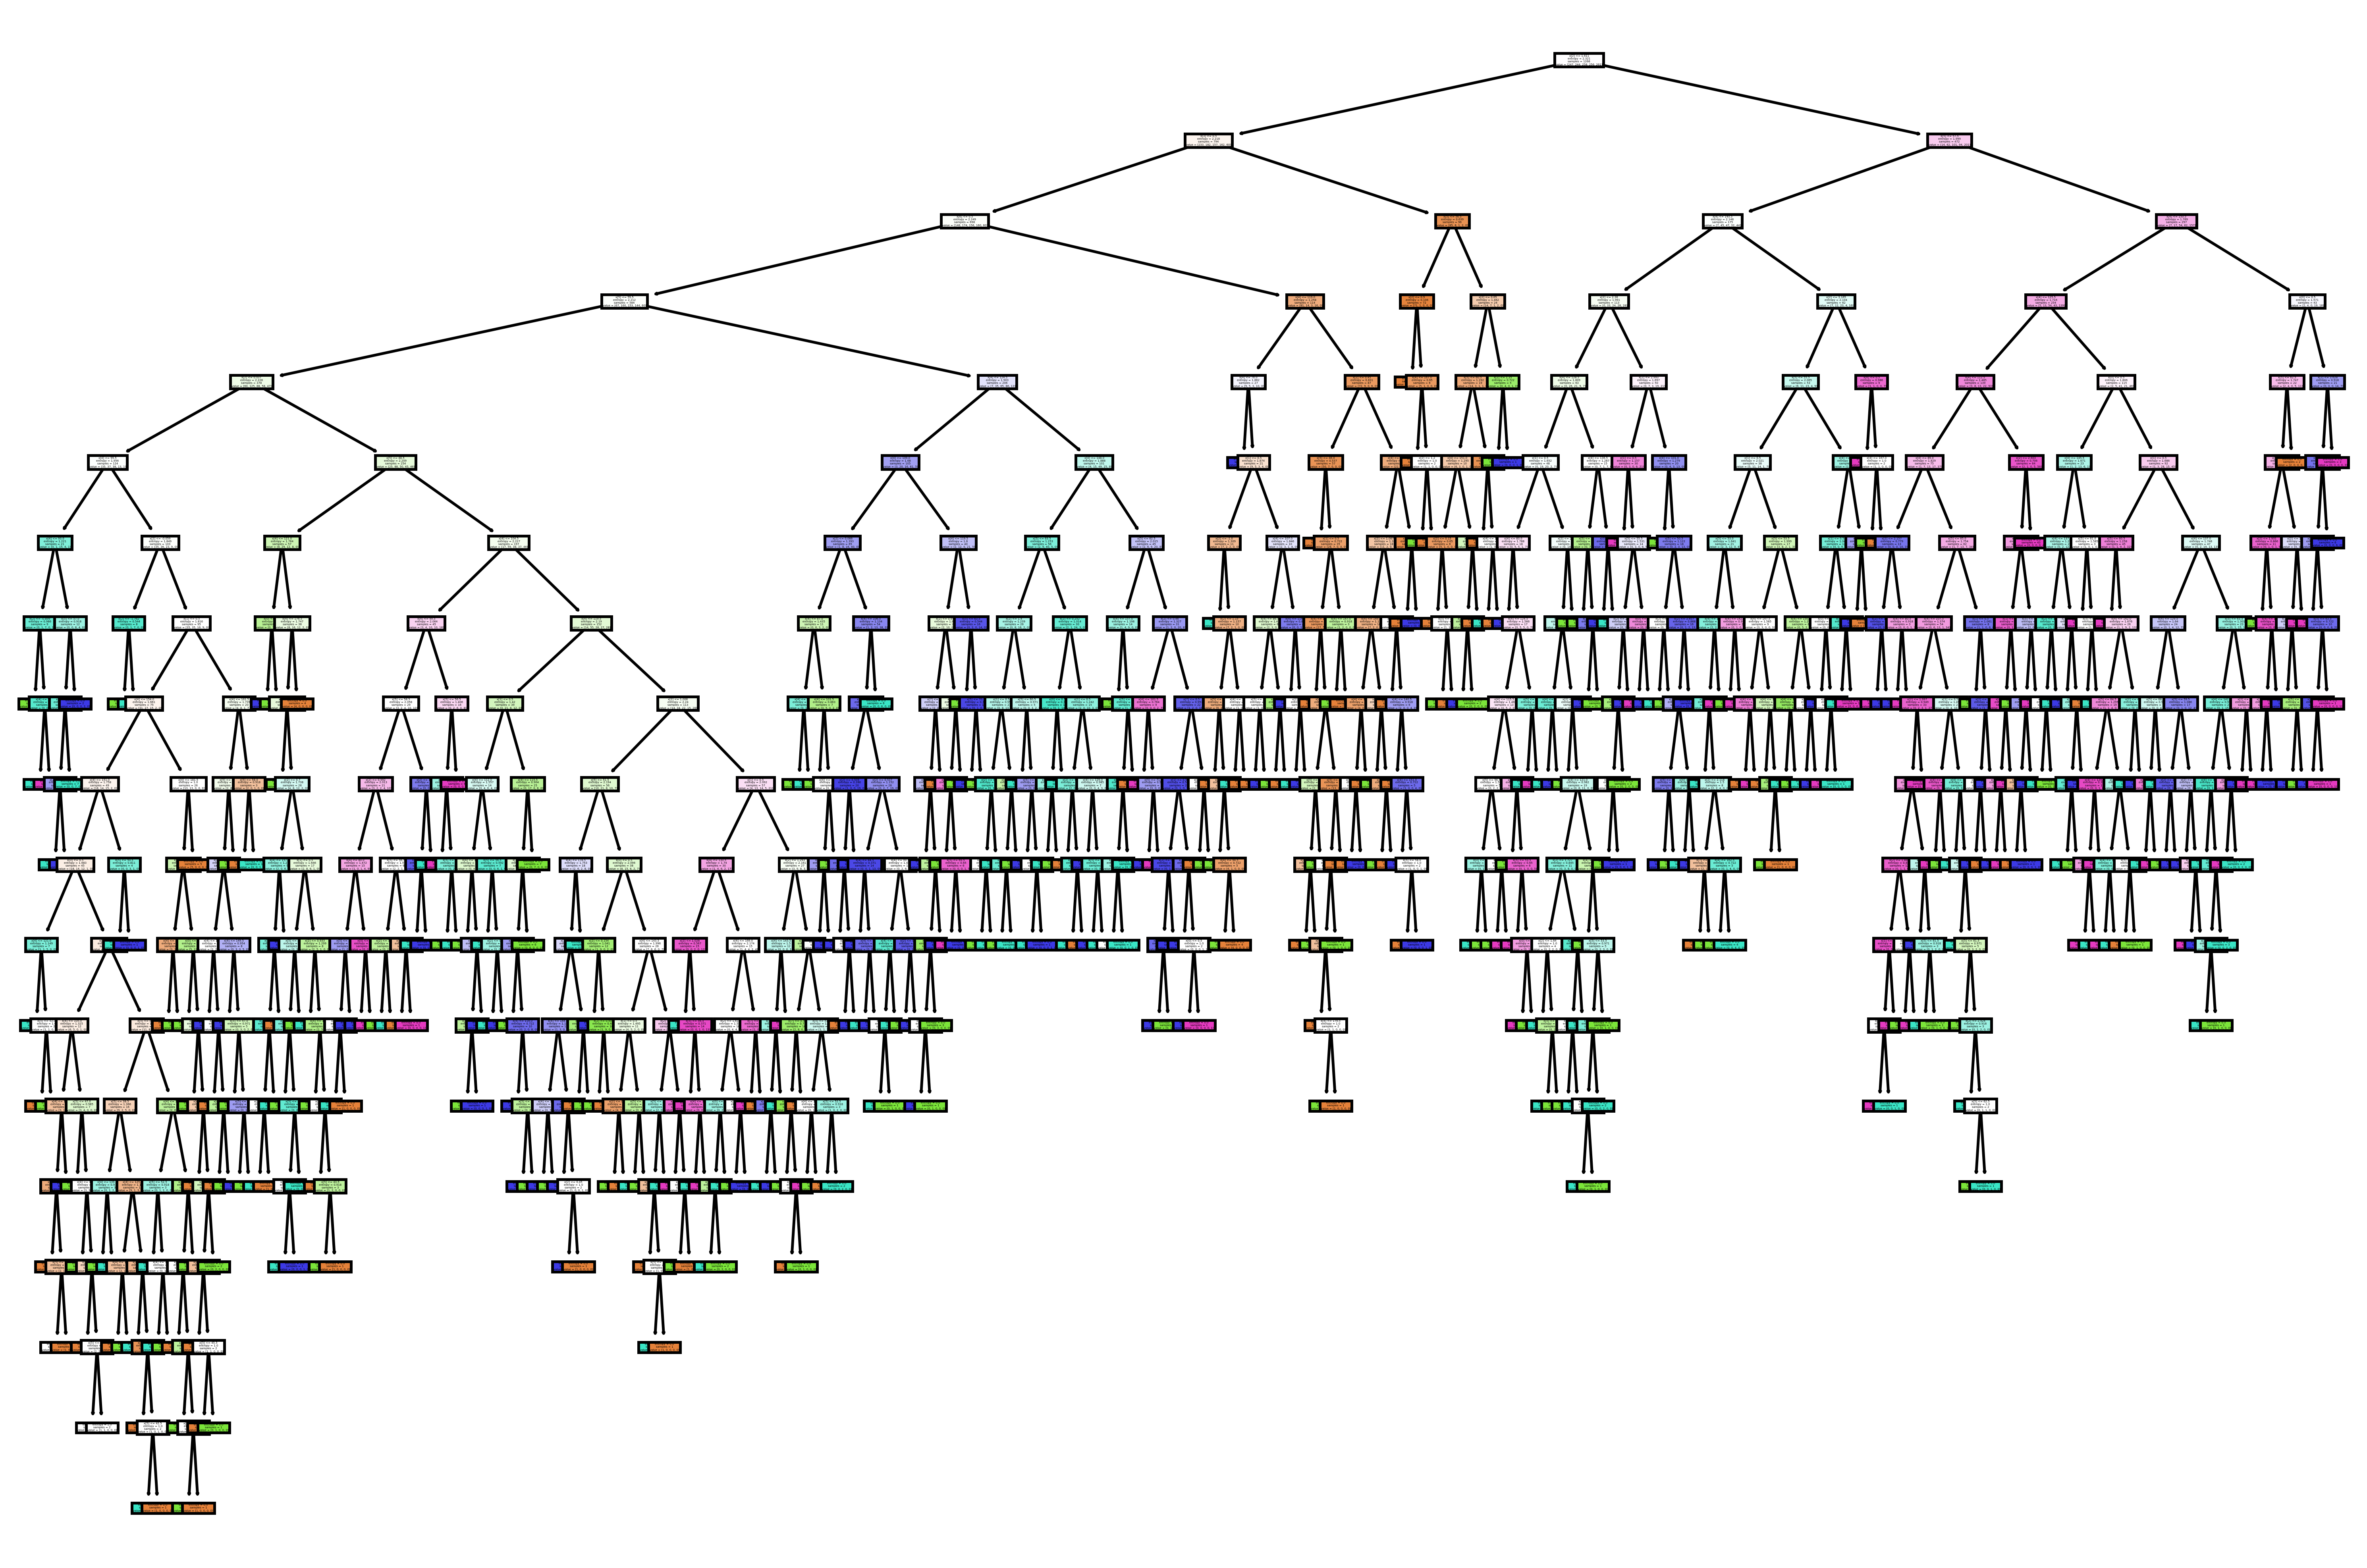

In [120]:
from sklearn import tree

plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [121]:
#Predicting on test data
preds = model_entropy.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    123
4    121
2    107
3    101
1     91
dtype: int64

In [122]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0   0   1   2   3   4
num                      
0      77  12   7   8   2
1      18  47  20   9  10
2      14  17  61   8  11
3      10  11  11  67  11
4       4   4   8   9  87

In [123]:
# Accuracy 
np.mean(preds==y_test)

0.6243093922651933

In [124]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.63      0.73      0.67       106
           1       0.52      0.45      0.48       104
           2       0.57      0.55      0.56       111
           3       0.66      0.61      0.64       110
           4       0.72      0.78      0.75       112

    accuracy                           0.62       543
   macro avg       0.62      0.62      0.62       543
weighted avg       0.62      0.62      0.62       543



In [125]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [126]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1849727577496738


### Accuracy vs alpha for training and testing sets

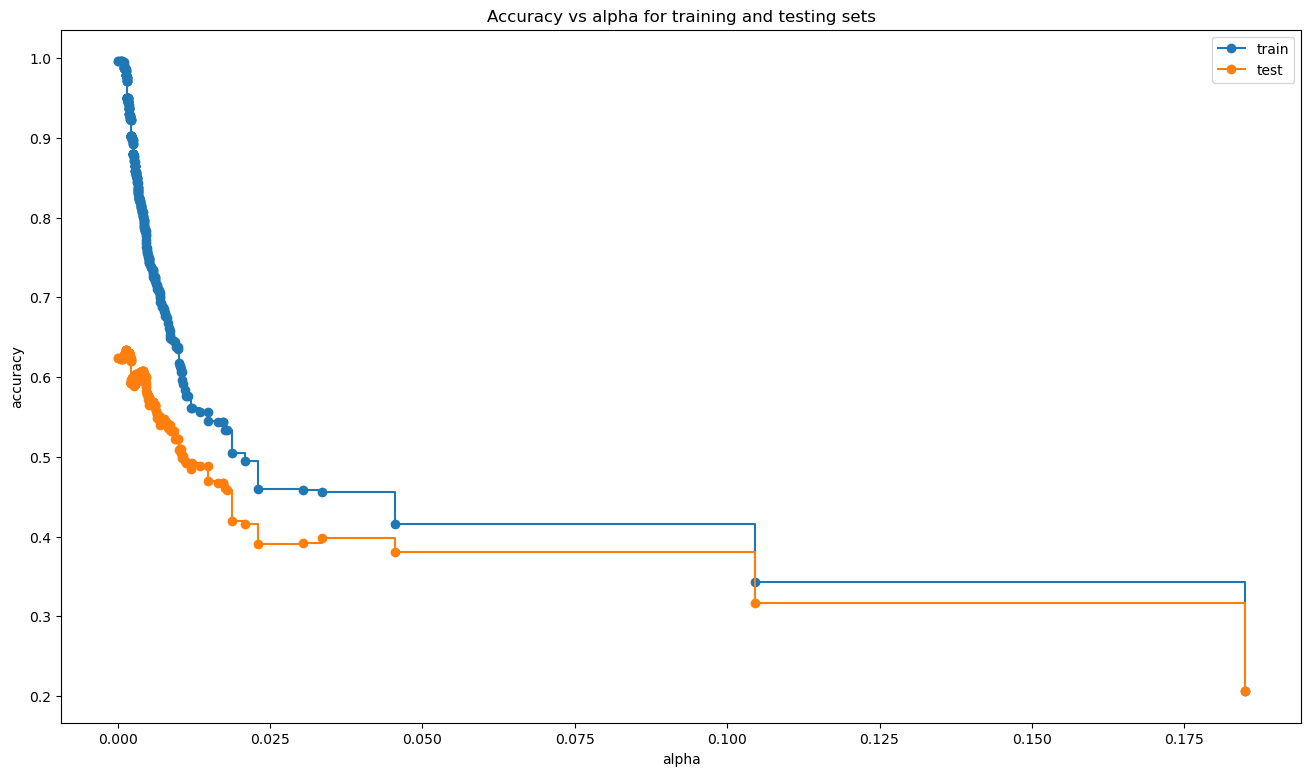

In [127]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [128]:
ccp_alphas

array([0.        , 0.        , 0.00049175, 0.00059628, 0.00059628,
       0.00067516, 0.00080642, 0.0009835 , 0.00105319, 0.00105319,
       0.00108803, 0.00108803, 0.00108803, 0.00108803, 0.00108803,
       0.00127824, 0.00128164, 0.00128164, 0.00136842, 0.00142561,
       0.00142561, 0.00142561, 0.00142561, 0.00142561, 0.00142561,
       0.00146901, 0.0015009 , 0.0015009 , 0.00152849, 0.00154034,
       0.00154034, 0.00154034, 0.00154034, 0.00157978, 0.00157978,
       0.00157978, 0.00157978, 0.00157978, 0.00157978, 0.00157978,
       0.00157978, 0.00157978, 0.00157978, 0.00157978, 0.00157978,
       0.00157978, 0.00157978, 0.00157978, 0.00157978, 0.00157978,
       0.00157978, 0.00157978, 0.00157978, 0.00157978, 0.00157978,
       0.00157978, 0.00157978, 0.00157978, 0.00157978, 0.00161283,
       0.00161283, 0.00161283, 0.00163575, 0.00163575, 0.00165866,
       0.00165866, 0.00167322, 0.00169171, 0.00169171, 0.00169171,
       0.00170885, 0.00177854, 0.00181585, 0.00182367, 0.00185

#### Choosing the best value of **`cc_alpha`** where the testing and training accuracy are almost same or near or closer to each other

In [163]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.0056544)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0056544, criterion='entropy', random_state=0)

In [164]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.7377567140600316 
Testing Accuracy 0.567219152854512


              precision    recall  f1-score   support

           0       0.71      0.68      0.69       106
           1       0.26      0.41      0.32       104
           2       0.00      0.00      0.00       111
           3       0.32      0.25      0.28       110
           4       0.39      0.66      0.49       112

    accuracy                           0.40       543
   macro avg       0.33      0.40      0.36       543
weighted avg       0.33      0.40      0.35       543



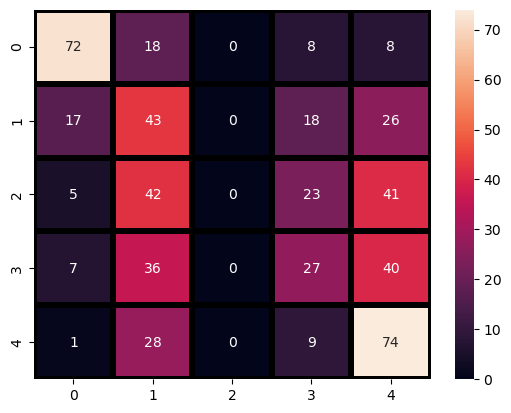

In [131]:
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

##### Before learning more about decision trees let’s get familiar with some of the terminologies.
<b>Root Nodes</b> – `It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.`

<b>Decision Nodes</b> – `the nodes we get after splitting the root nodes are called Decision Node`

<b>Leaf Nodes</b> – `Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.`

<b>Branch/Sub-tree</b> – `just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.`

<b>Pruning</b> – `is nothing but cutting down some nodes to stop overfitting.`

<b>Splitting</b> - `Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.`

<b>Pruning</b> - `Pruning is the process of removing the unwanted branches from the tree`

<b>Parent/Child node</b> - `The root node of the tree is called the parent node, and other nodes are called the child nodes.`

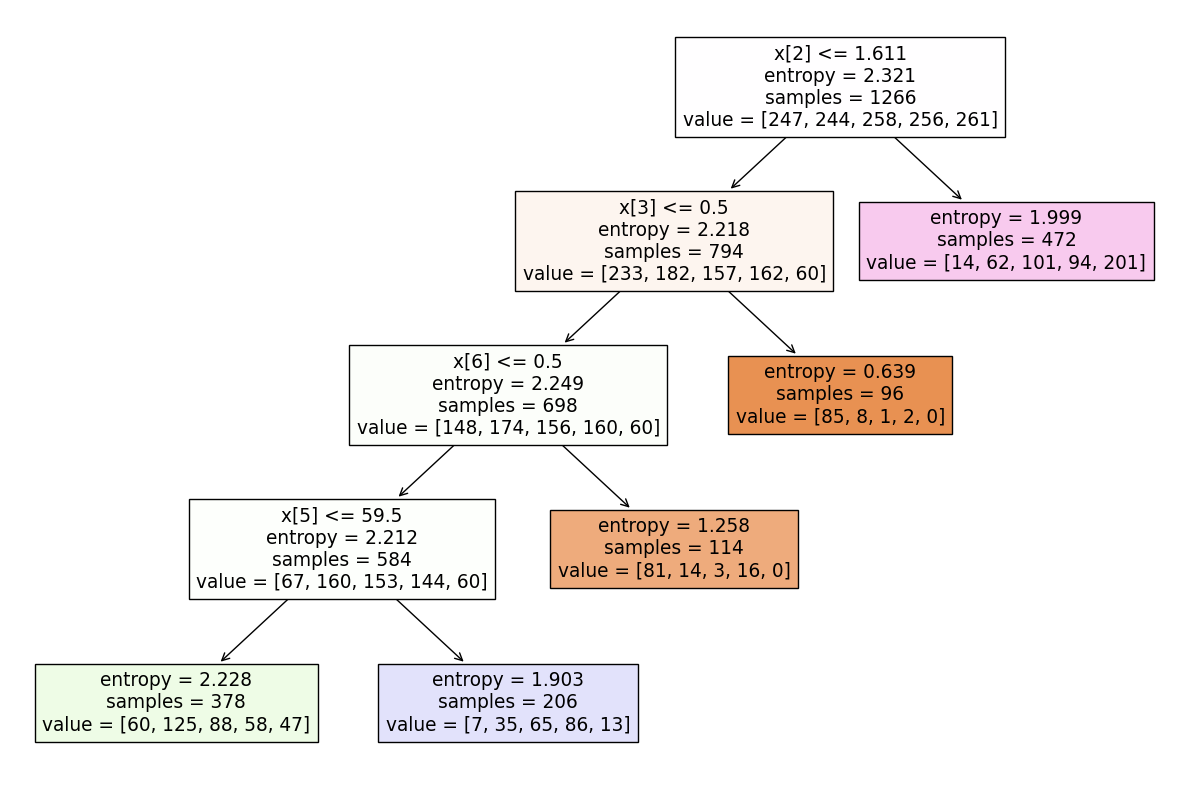

In [132]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

### Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning

In [133]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

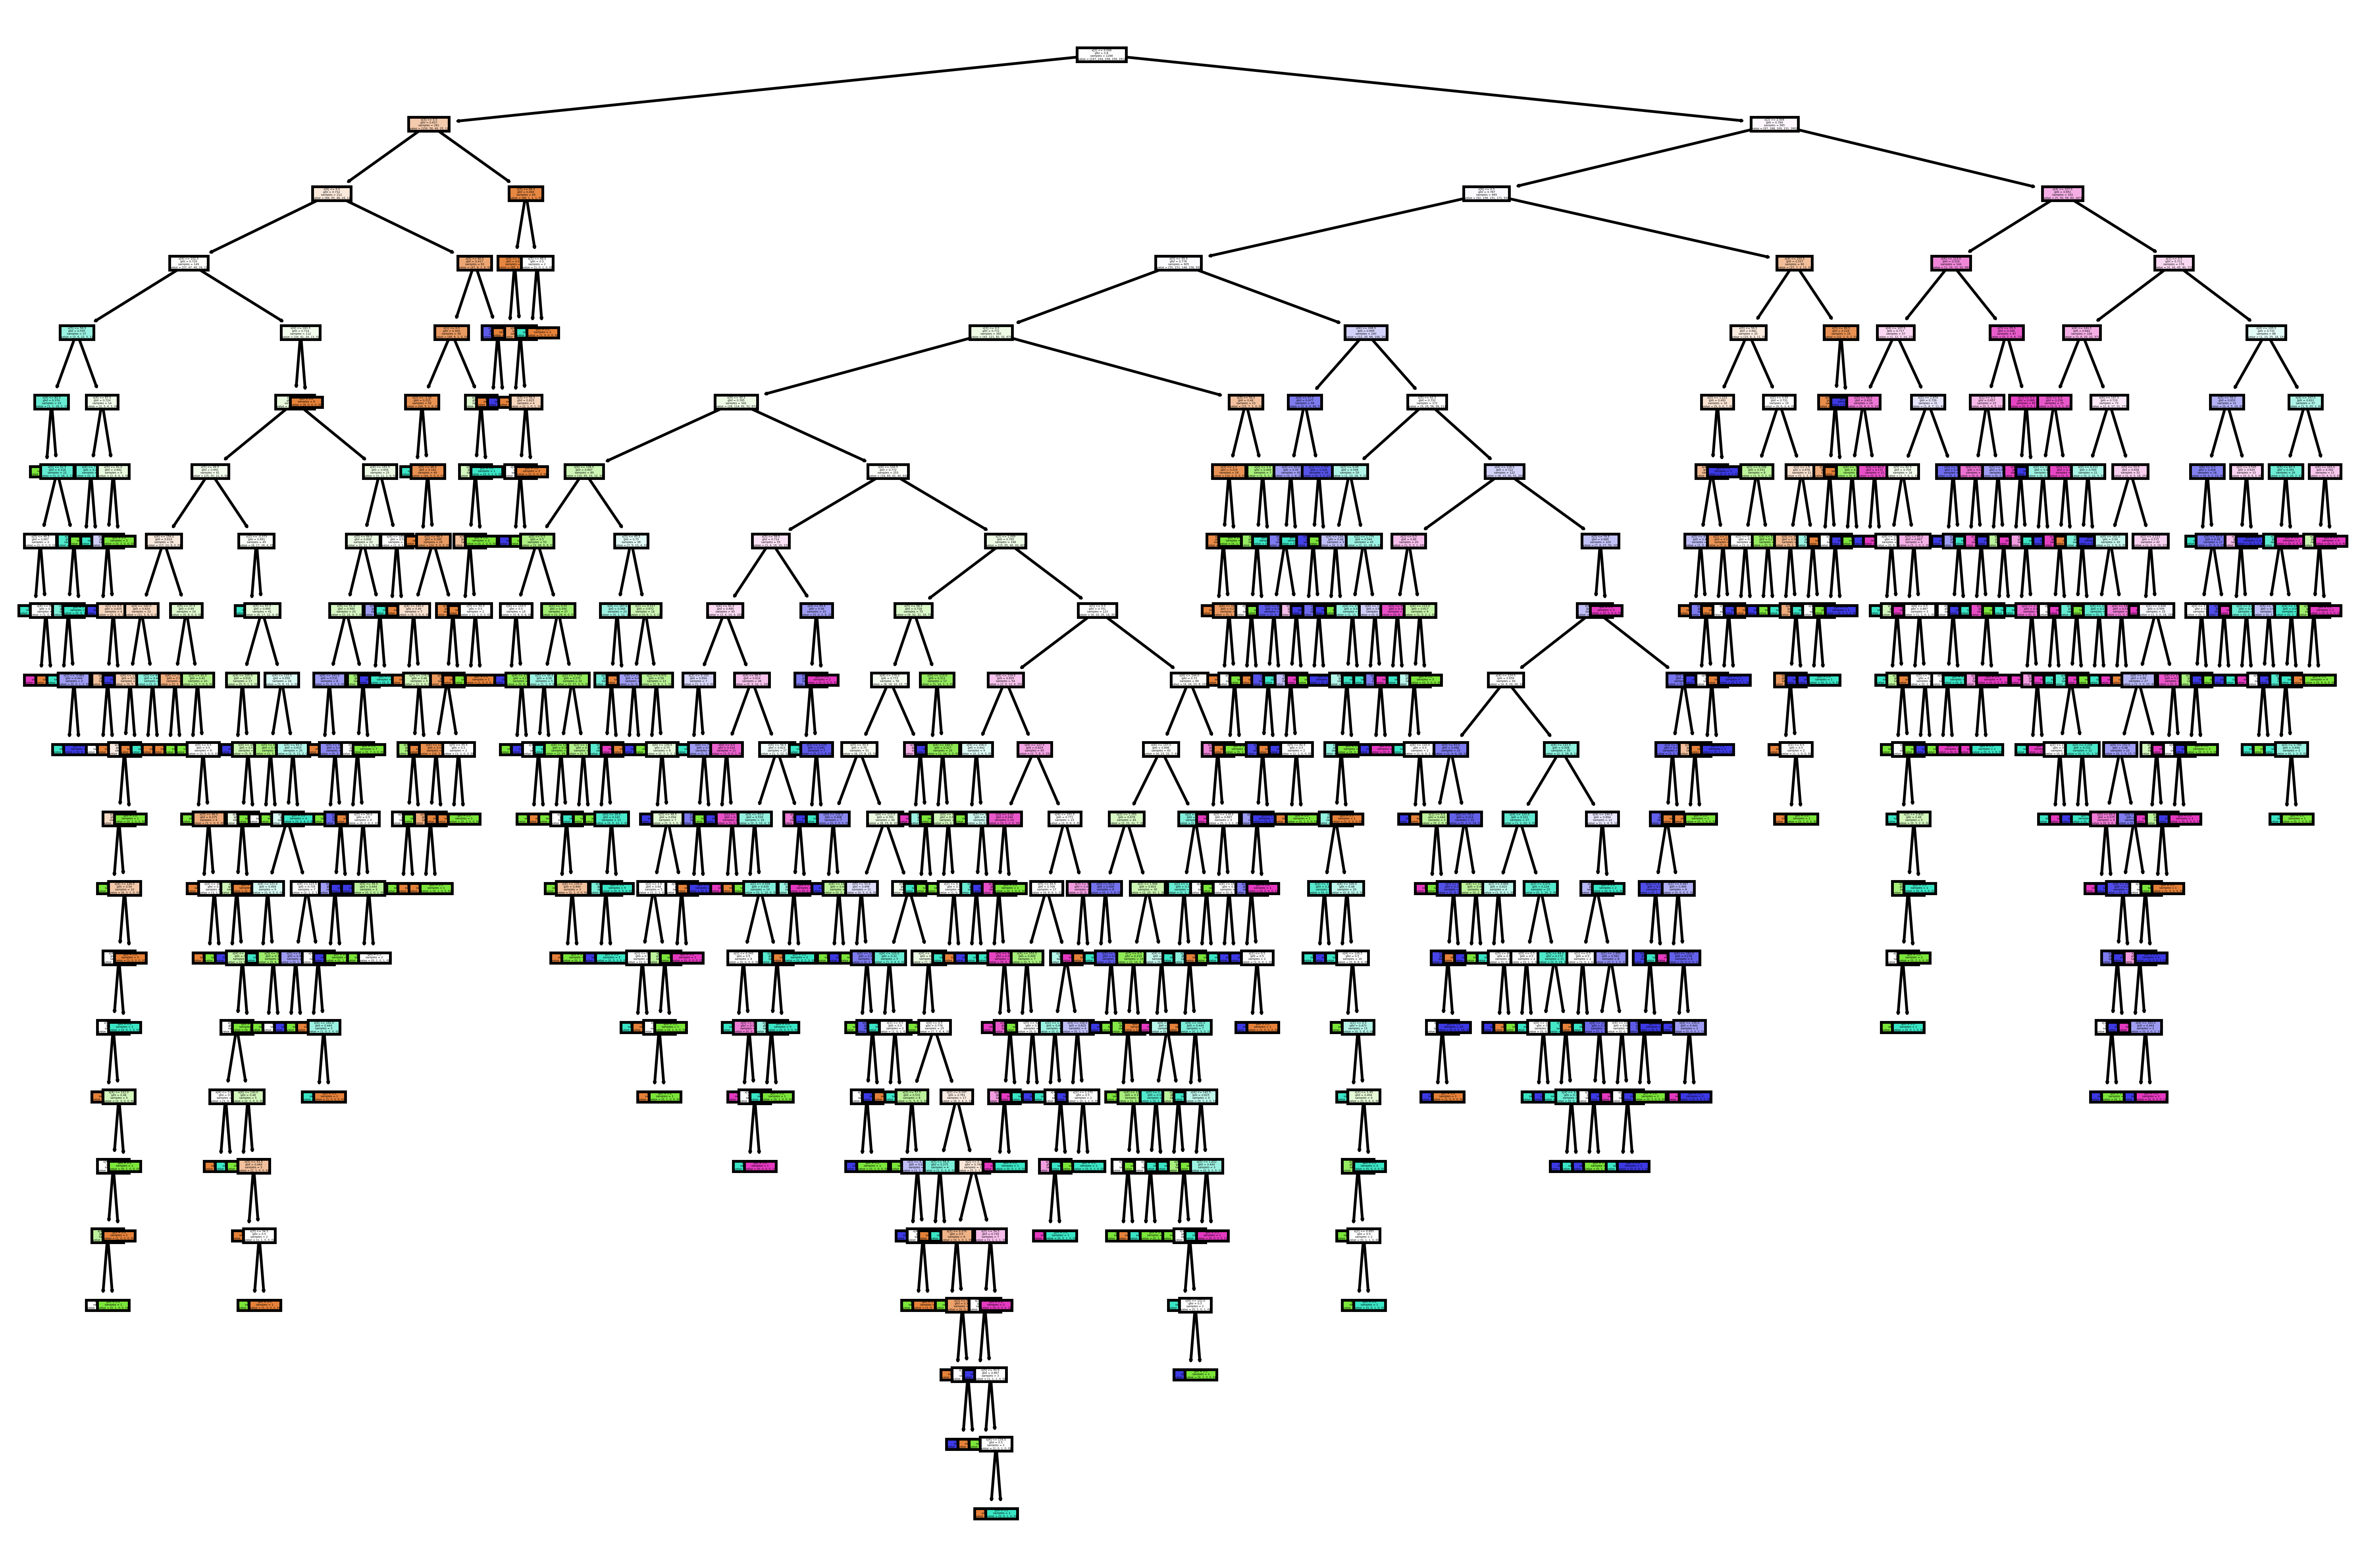

In [134]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [135]:
#Predicting on test data
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

3    115
4    113
1    107
0    105
2    103
dtype: int64

In [136]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0   0   1   2   3   4
num                      
0      67  19   7   9   4
1      18  50  16  15   5
2      12  14  66  11   8
3       7  17   7  72   7
4       1   7   7   8  89

In [137]:
# Accuracy 
np.mean(preds==y_test)

0.6335174953959485

In [138]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       106
           1       0.47      0.48      0.47       104
           2       0.64      0.59      0.62       111
           3       0.63      0.65      0.64       110
           4       0.79      0.79      0.79       112

    accuracy                           0.63       543
   macro avg       0.63      0.63      0.63       543
weighted avg       0.63      0.63      0.63       543



In [139]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [140]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.048355171261922236


### Accuracy vs alpha for training and testing sets

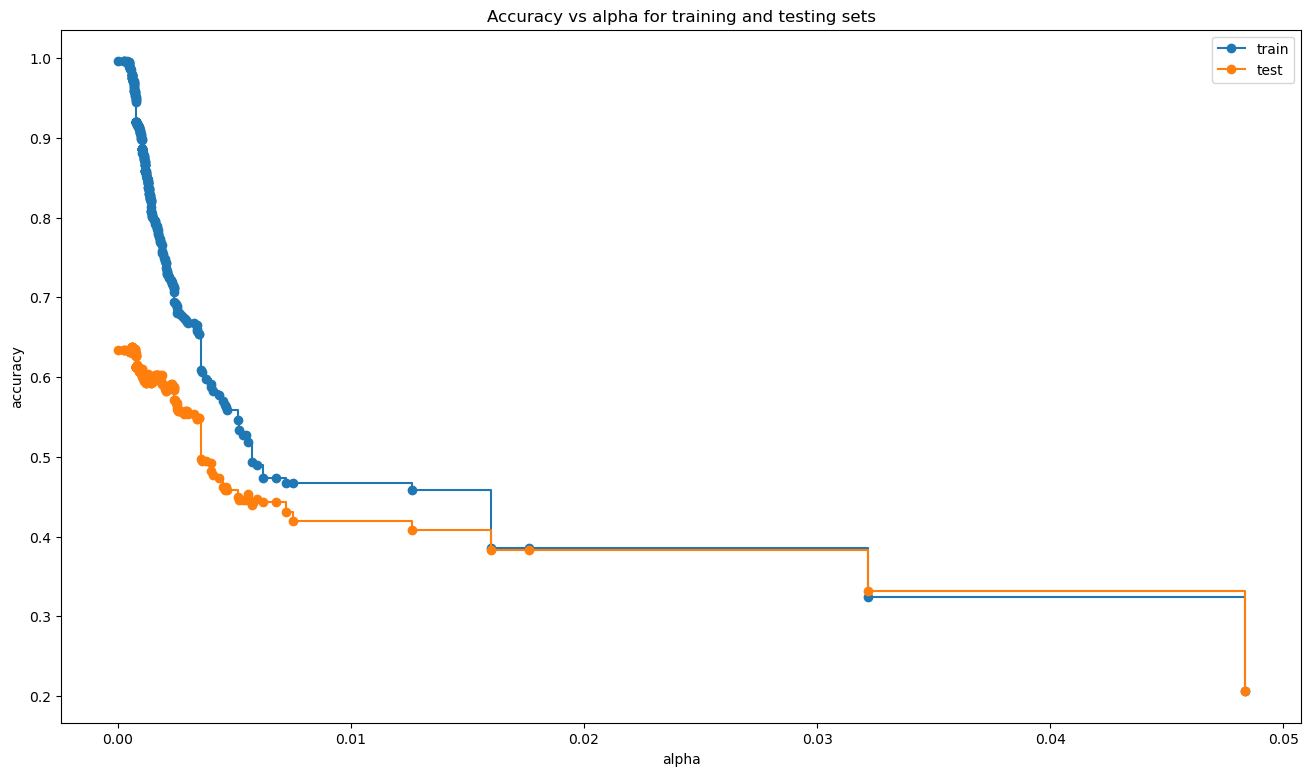

In [141]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [142]:
ccp_alphas

array([0.        , 0.0002633 , 0.0002633 , 0.0002633 , 0.00039494,
       0.00042127, 0.00047393, 0.00047393, 0.00047872, 0.00049149,
       0.00049149, 0.00050026, 0.00050026, 0.00052659, 0.00052659,
       0.00052659, 0.00052659, 0.00052659, 0.00057447, 0.00059242,
       0.00059242, 0.00059242, 0.00059242, 0.00059242, 0.00059242,
       0.00063191, 0.00063191, 0.00063191, 0.00063191, 0.00065824,
       0.00065824, 0.00065824, 0.00065824, 0.00065824, 0.00067705,
       0.00069115, 0.00069115, 0.00069115, 0.00069585, 0.00070212,
       0.00070212, 0.00070976, 0.0007109 , 0.0007109 , 0.0007109 ,
       0.00072407, 0.00072913, 0.00074601, 0.00075039, 0.00075698,
       0.00075698, 0.00076356, 0.00076441, 0.00076699, 0.00077494,
       0.00077735, 0.00078989, 0.00078989, 0.00078989, 0.00078989,
       0.00078989, 0.00078989, 0.00078989, 0.00078989, 0.00078989,
       0.00078989, 0.00078989, 0.00078989, 0.00078989, 0.00078989,
       0.00078989, 0.00078989, 0.00078989, 0.00078989, 0.00078

In [155]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=0.00134939)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00134939, random_state=0)

In [156]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.8341232227488151 
Testing Accuracy 0.6003683241252302


              precision    recall  f1-score   support

           0       0.64      0.64      0.64       106
           1       0.46      0.49      0.48       104
           2       0.59      0.54      0.56       111
           3       0.52      0.56      0.54       110
           4       0.81      0.76      0.78       112

    accuracy                           0.60       543
   macro avg       0.60      0.60      0.60       543
weighted avg       0.61      0.60      0.60       543



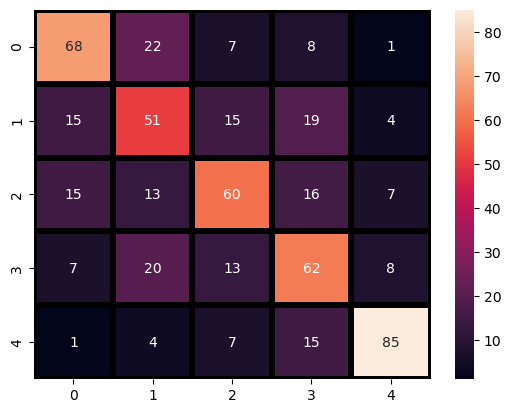

In [157]:
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

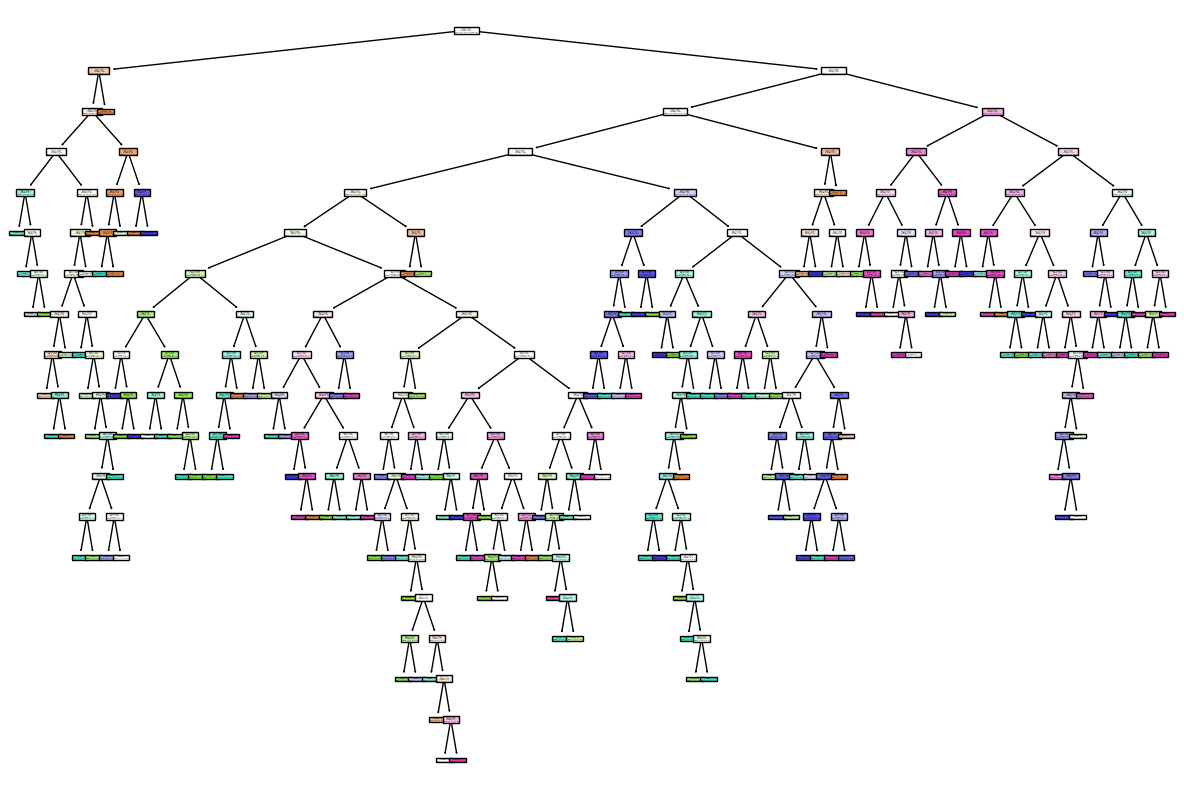

In [160]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()